In [31]:
# Load libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# from kerastuner.tuners import BayesianOptimization


from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf



#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [32]:
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['dt'], dayfirst=True)
df_btc['dt'] = df_btc['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df_btc = df_btc[['dt','BTC_AdjClose']]
# df_btc = df_btc.set_index('dt')
df_btc.dtypes

dt              datetime64[ns]
BTC_AdjClose           float64
dtype: object

In [33]:
tickers = ['TSLA'#, 'AAPL'
            ]



df = pd.read_csv('combined_dataset_daily_sentiment_TSLA_AAPL.csv')
df['dt'] = df['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df = df.set_index('dt')

df = df[['TSLA_AdjClose', 'TSLA_Open', 'TSLA_High', 'TSLA_Low','TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E'#,'sentiment_vader',
       #'total_msgs'
       ]]

# set daterange for model
# end_date = '2021-08-01'

# df = df.loc[:end_date]
df.columns

Index(['TSLA_AdjClose', 'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Volume',
       'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low', 'TSLA_%K', 'TSLA_%D',
       'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO', 'DGS6MO', 'DGS10',
       'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD', 'DCOILWTICO',
       'TSLA_EPS_diluted', 'TSLA_P/E'],
      dtype='object')

In [34]:
df

TSLA_AdjClose   TSLA_Open   TSLA_High    TSLA_Low  TSLA_Volume  \
dt                                                                           
2012-11-05       6.300000    5.960000    6.316000    5.866000   10244500.0   
2012-11-06       6.230000    6.122000    6.240000    5.990000   11620000.0   
2012-11-07       6.308000    6.200000    6.410000    6.162000    8572500.0   
2012-11-08       6.262000    6.202000    6.376000    6.188000    6370000.0   
2012-11-09       6.064000    6.120000    6.186000    5.970000    4315000.0   
...                   ...         ...         ...         ...          ...   
2022-07-26     776.580017  799.539978  801.929993  768.789978   22273600.0   
2022-07-27     824.460022  791.429993  827.780029  785.369995   29370000.0   
2022-07-28     842.700012  840.200012  849.900024  818.400024   28241000.0   
2022-07-29     891.450012  842.099976  894.960022  837.299988   31771000.0   
2022-08-01     891.830017  903.830017  935.630005  885.000000   39014300.0   

            AAPL_AdjClose  TSLA_14-high  TSLA_14-low    TSLA_%K    TSLA_%D  \
dt                                                                           
2012-11-05      17.928806      6.316000     5.372000  98.305106  88.586524   
2012-11-06      17.874533      6.316000     5.404000  90.570181  88.485070   
2012-11-07      17.190607      6.410000     5.404000  89.860859  92.912049   
2012-11-08      16.566753      6.410000     5.404000  85.288295  88.573112   
2012-11-09      16.853561      6.410000     5.404000  65.606391  80.251848   
...                   ...           ...          ...        ...        ...   
2022-07-26     151.600006    842.359985   675.099976  60.672029  75.098009   
2022-07-27     156.789993    842.359985   675.099976  89.298121  75.937677   
2022-07-28     157.350006    849.900024   675.099976  95.881001  81.950384   
2022-07-29     162.509995    894.960022   675.099976  98.403525  94.527549   
2022-08-01     161.509995    935.630005   675.099976  83.188123  92.490883   

            ...   DFF  DGS3MO  DGS6MO  DGS10  BAMLH0A0HYM2  VXIBMCLS  \
dt          ...                                                        
2012-11-05  ...  0.17    0.11    0.15   1.72          5.57     19.64   
2012-11-06  ...  0.16    0.10    0.15   1.78          5.49     19.60   
2012-11-07  ...  0.16    0.10    0.14   1.68          5.63     20.49   
2012-11-08  ...  0.16    0.10    0.15   1.62          5.67     20.85   
2012-11-09  ...  0.16    0.09    0.15   1.61          5.77     20.82   
...         ...   ...     ...     ...    ...           ...       ...   
2022-07-26  ...  1.58    2.62    3.06   2.81          5.06     25.24   
2022-07-27  ...  1.58    2.62    3.06   2.81          5.06     25.24   
2022-07-28  ...  1.58    2.62    3.06   2.81          5.06     25.24   
2022-07-29  ...  1.58    2.62    3.06   2.81          5.06     25.24   
2022-08-01  ...  1.58    2.62    3.06   2.81          5.06     25.24   

            USEPUINDXD  DCOILWTICO  TSLA_EPS_diluted    TSLA_P/E  
dt                                                                
2012-11-05      225.43       85.64           -0.7440   -8.467742  
2012-11-06      195.50       88.62           -0.7440   -8.373656  
2012-11-07      358.00       84.50           -0.7440   -8.478495  
2012-11-08      241.14       85.07           -0.7440   -8.416667  
2012-11-09      278.07       86.08           -0.7440   -8.150538  
...                ...         ...               ...         ...  
2022-07-26       30.93       99.83            8.3024   93.536811  
2022-07-27       30.93       99.83            8.3024   99.303818  
2022-07-28       30.93       99.83            8.3024  101.500772  
2022-07-29       30.93       99.83            8.3024  107.372568  
2022-08-01       30.93       99.83            8.3024  107.418339  

[3555 rows x 23 columns]

In [35]:
# set daterange for model
end_date = '2021-08-30'

df2 = pd.merge(df, df_btc, how='outer', on='dt')
df2 = df2.set_index('dt')
df2['BTC_AdjClose'].replace(np.nan, 0, inplace=True)
df2 = df2.loc[:end_date]
df2.reindex()

TSLA_AdjClose   TSLA_Open   TSLA_High    TSLA_Low  TSLA_Volume  \
dt                                                                           
2012-11-05       6.300000    5.960000    6.316000    5.866000   10244500.0   
2012-11-06       6.230000    6.122000    6.240000    5.990000   11620000.0   
2012-11-07       6.308000    6.200000    6.410000    6.162000    8572500.0   
2012-11-08       6.262000    6.202000    6.376000    6.188000    6370000.0   
2012-11-09       6.064000    6.120000    6.186000    5.970000    4315000.0   
...                   ...         ...         ...         ...          ...   
2021-08-26     701.159973  708.309998  715.400024  697.619995   13214300.0   
2021-08-27     711.919983  705.000000  715.000000  702.099976   13833800.0   
2021-08-28     711.919983  705.000000  715.000000  702.099976   13833800.0   
2021-08-29     711.919983  705.000000  715.000000  702.099976   13833800.0   
2021-08-30     730.909973  714.719971  731.000000  712.729980   18604200.0   

            AAPL_AdjClose  TSLA_14-high  TSLA_14-low    TSLA_%K    TSLA_%D  \
dt                                                                           
2012-11-05      17.928806      6.316000     5.372000  98.305106  88.586524   
2012-11-06      17.874533      6.316000     5.404000  90.570181  88.485070   
2012-11-07      17.190607      6.410000     5.404000  89.860859  92.912049   
2012-11-08      16.566753      6.410000     5.404000  85.288295  88.573112   
2012-11-09      16.853561      6.410000     5.404000  65.606391  80.251848   
...                   ...           ...          ...        ...        ...   
2021-08-26     146.921646    729.900024   648.840027  64.544717  71.687598   
2021-08-27     147.977219    729.900024   648.840027  77.818848  73.098073   
2021-08-28     147.977219    729.900024   648.840027  77.818848  73.098073   
2021-08-29     147.977219    729.900024   648.840027  77.818848  73.098073   
2021-08-30     152.478256    731.000000   648.840027  99.890425  80.751330   

            ...  DGS3MO  DGS6MO  DGS10  BAMLH0A0HYM2  VXIBMCLS  USEPUINDXD  \
dt          ...                                                              
2012-11-05  ...    0.11    0.15   1.72          5.57     19.64      225.43   
2012-11-06  ...    0.10    0.15   1.78          5.49     19.60      195.50   
2012-11-07  ...    0.10    0.14   1.68          5.63     20.49      358.00   
2012-11-08  ...    0.10    0.15   1.62          5.67     20.85      241.14   
2012-11-09  ...    0.09    0.15   1.61          5.77     20.82      278.07   
...         ...     ...     ...    ...           ...       ...         ...   
2021-08-26  ...    0.05    0.06   1.34          3.20     20.68       54.90   
2021-08-27  ...    0.05    0.05   1.31          3.17     19.41       69.52   
2021-08-28  ...    0.05    0.05   1.31          3.17     19.41      147.47   
2021-08-29  ...    0.05    0.05   1.31          3.17     19.41      105.19   
2021-08-30  ...    0.05    0.05   1.29          3.16     20.02       77.75   

            DCOILWTICO  TSLA_EPS_diluted    TSLA_P/E  BTC_AdjClose  
dt                                                                  
2012-11-05       85.64           -0.7440   -8.467742       0.00000  
2012-11-06       88.62           -0.7440   -8.373656       0.00000  
2012-11-07       84.50           -0.7440   -8.478495       0.00000  
2012-11-08       85.07           -0.7440   -8.416667       0.00000  
2012-11-09       86.08           -0.7440   -8.150538       0.00000  
...                ...               ...         ...           ...  
2021-08-26       67.42            1.9191  365.358748   46942.21875  
2021-08-27       68.84            1.9191  370.965548   49058.66797  
2021-08-28       68.84            1.9191  370.965548   48902.40234  
2021-08-29       68.84            1.9191  370.965548   48829.83203  
2021-08-30       69.28            1.9191  380.860806   47054.98438  

[3221 rows x 24 columns]

## Standardize Data

In [36]:
# scaler = StandardScaler().fit(df)
# scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
# scaled_data


In [37]:
df.columns

Index(['TSLA_AdjClose', 'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Volume',
       'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low', 'TSLA_%K', 'TSLA_%D',
       'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO', 'DGS6MO', 'DGS10',
       'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD', 'DCOILWTICO',
       'TSLA_EPS_diluted', 'TSLA_P/E'],
      dtype='object')

In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

#fit multiple linear regression model
model = ols("TSLA_AdjClose ~ AAPL_AdjClose", data=df).fit()
display(durbin_watson(model.resid))

#view model summary
print(model.summary())

0.012729401238700786

                            OLS Regression Results                            
Dep. Variable:          TSLA_AdjClose   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.347e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:54:16   Log-Likelihood:                -21054.
No. Observations:                3555   AIC:                         4.211e+04
Df Residuals:                    3553   BIC:                         4.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -140.1489      2.377    -58.949

## Lagged Returns

In [39]:
# lagged returns

return_period = 5

Y = np.log(df2[tickers[0]+'_AdjClose']).diff(return_period).shift(-return_period)

Y.name = Y.name +'_pred'

lagged_data_0 = [ tickers[0]+'_%K', tickers[0]+'_%D', tickers[0]+'_%R',tickers[0]+'_RSI']
lagged_data_14 = [tickers[0]+'_14-high', tickers[0]+'_14-low']

try:
    lagged_data_1 = [tickers[1]+'_14-high', tickers[1]+'_14-low', tickers[1]+'_%K', tickers[1]+'_%D', tickers[1]+'_%R', tickers[1]+'_RSI']
    lagged_data = lagged_data_0 + lagged_data_1
except:
    lagged_data = lagged_data_0

response_variables = [tickers[0]+'_AdjClose']

X1 = df2.loc[:, ~df2.columns.isin([*lagged_data, *response_variables])].select_dtypes(exclude='object')
X1_lagged = np.log(X1).shift(-return_period)
X2 = df2.loc[:, df2.columns.isin([*lagged_data_0])]
X2_lagged = np.log(X2/100)
X3 = df2.loc[:, df2.columns.isin([*lagged_data_14])]
X3_norm = np.log(X3)
X = pd.concat([X1_lagged, X2_lagged, X3_norm], axis=1)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.replace(np.nan, 0, inplace=True)
Y.replace([np.inf, -np.inf], np.nan, inplace=True)
Y.replace(np.nan, 0, inplace=True)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [40]:
dataset

TSLA_AdjClose_pred  TSLA_Open  TSLA_High  TSLA_Low  TSLA_Volume  \
dt                                                                            
2012-11-05           -0.038180   1.811562   1.822289  1.786747    15.277608   
2012-11-10            0.016356   1.834180   1.838643  1.808289    15.408819   
2012-11-15            0.068344   1.880991   1.890095  1.853482    15.344281   
2012-11-20           -0.026717   1.874874   1.881905  1.846879    14.581676   
2012-11-25            0.051262   1.905981   1.925124  1.887373    15.775817   
...                        ...        ...        ...       ...          ...   
2021-08-10            0.010062   6.584391   6.592908  6.571359    16.632804   
2021-08-15           -0.052838   6.526275   6.539774  6.512785    16.512965   
2021-08-20            0.044479   6.561073   6.575034  6.556778    16.352820   
2021-08-25            0.027337   6.571891   6.594413  6.569103    16.738898   
2021-08-30            0.000000   0.000000   0.000000  0.000000     0.000000   

            AAPL_AdjClose  TSLA_14-high  TSLA_14-low       S&P       DFF  ...  \
dt                                                                        ...   
2012-11-05       2.824562      1.857859     1.687139  7.229730 -1.832581  ...   
2012-11-10       2.784583      1.860041     1.687139  7.210324 -1.832581  ...   
2012-11-15       2.849564      1.894617     1.729884  7.235482 -1.832581  ...   
2012-11-20       2.868268      1.901212     1.769173  7.250742 -1.832581  ...   
2012-11-25       2.892094      1.925416     1.797079  7.255718 -1.832581  ...   
...                   ...           ...          ...       ...       ...  ...   
2021-08-10       5.000417      6.592908     6.441329  8.404696 -2.302585  ...   
2021-08-15       4.994295      6.592908     6.475186  8.398786 -2.407946  ...   
2021-08-20       4.995442      6.592908     6.475186  8.410986 -2.407946  ...   
2021-08-25       5.027022      6.594413     6.475186  8.418210 -2.525729  ...   
2021-08-30       0.000000      0.000000     0.000000  0.000000  0.000000  ...   

            DCOILWTICO  TSLA_EPS_diluted  TSLA_P/E  BTC_AdjClose   TSLA_%K  \
dt                                                                           
2012-11-05    4.455277          0.000000  0.000000      0.000000 -0.017094   
2012-11-10    4.447931          0.000000  0.000000      0.000000 -0.421497   
2012-11-15    4.459682          0.000000  0.000000      0.000000 -0.294239   
2012-11-20    4.466023          0.000000  0.000000      0.000000 -0.050773   
2012-11-25    4.483454          0.000000  0.000000      0.000000 -0.391076   
...                ...               ...       ...           ...       ...   
2021-08-10    4.224788          0.651856  5.923457     10.758902 -0.186342   
2021-08-15    4.131159          0.651856  5.870619     10.806474 -0.132391   
2021-08-20    4.227418          0.651856  5.915097     10.798775 -0.947746   
2021-08-25    4.238156          0.651856  5.942434     10.759072 -0.262266   
2021-08-30    0.000000          0.000000  0.000000      0.000000 -0.001096   

             TSLA_%D   TSLA_%R  TSLA_RSI  TSLA_14-high  TSLA_14-low  
dt                                                                   
2012-11-05 -0.121190 -4.077550 -0.429329      1.843086     1.681200  
2012-11-10 -0.220000 -1.067299 -0.580960      1.857859     1.687139  
2012-11-15 -0.177324 -1.366877 -0.573397      1.860041     1.687139  
2012-11-20 -0.054995 -3.005679 -0.416595      1.894617     1.729884  
2012-11-25 -0.213370 -1.128027 -0.518998      1.901212     1.769173  
...              ...       ...       ...           ...          ...  
2021-08-10 -0.215442 -1.771897 -0.469982      6.588844     6.441329  
2021-08-15 -0.128901 -2.087458 -0.461912      6.592908     6.441329  
2021-08-20 -0.927374 -0.490392 -0.709786      6.592908     6.475186  
2021-08-25 -0.303794 -1.466665 -0.553381      6.592908     6.475186  
2021-08-30 -0.213796 -6.816315 -0.481219      6.594413     6.475186  

[645

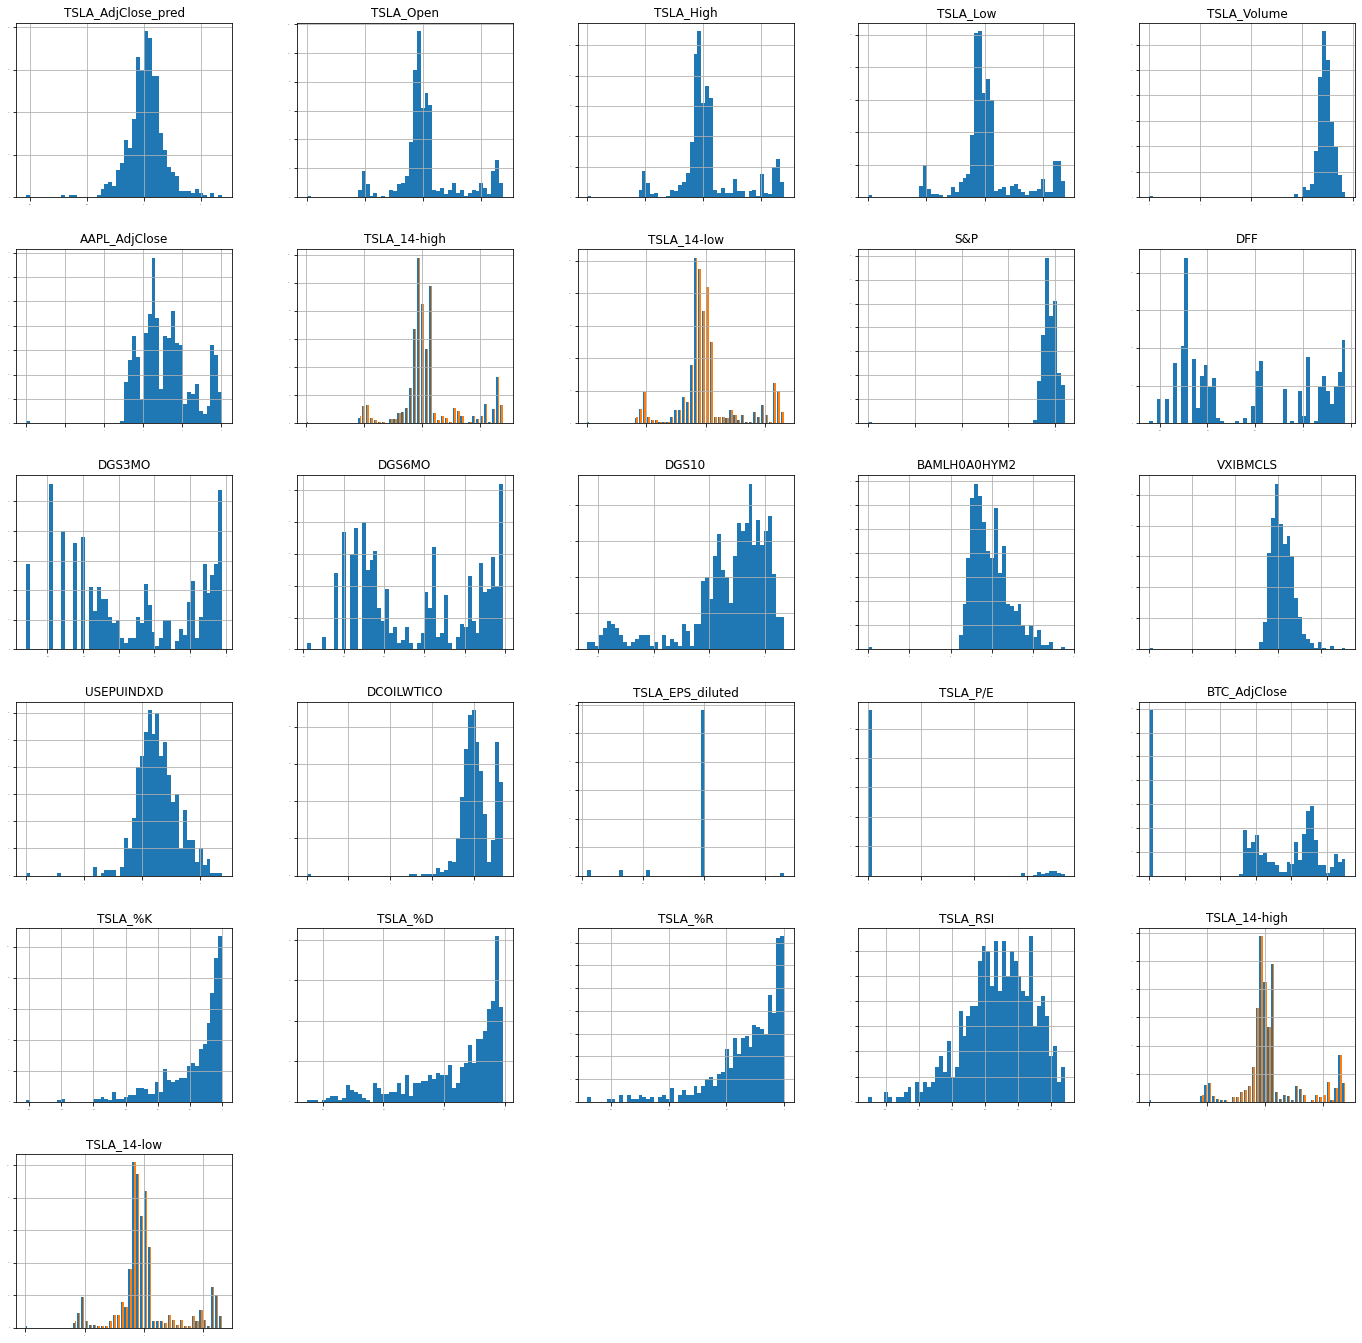

In [41]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(24,24))
pyplot.show();

<AxesSubplot:title={'center':'Correlation Matrix'}>

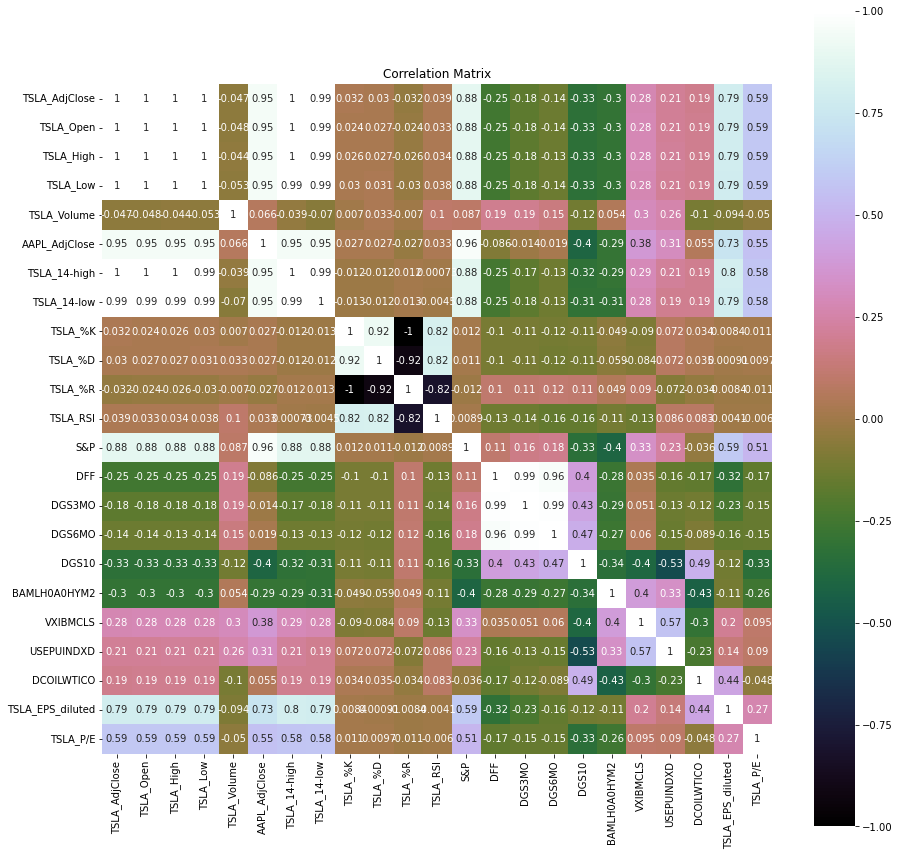

In [42]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

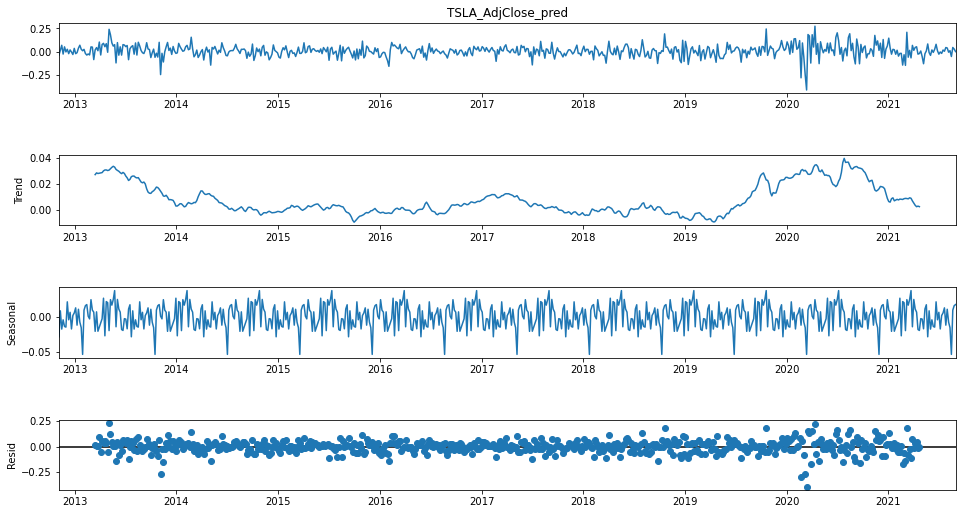

In [43]:
res = sm.tsa.seasonal_decompose(Y,  period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [44]:
dataset

TSLA_AdjClose_pred  TSLA_Open  TSLA_High  TSLA_Low  TSLA_Volume  \
dt                                                                            
2012-11-05           -0.038180   1.811562   1.822289  1.786747    15.277608   
2012-11-10            0.016356   1.834180   1.838643  1.808289    15.408819   
2012-11-15            0.068344   1.880991   1.890095  1.853482    15.344281   
2012-11-20           -0.026717   1.874874   1.881905  1.846879    14.581676   
2012-11-25            0.051262   1.905981   1.925124  1.887373    15.775817   
...                        ...        ...        ...       ...          ...   
2021-08-10            0.010062   6.584391   6.592908  6.571359    16.632804   
2021-08-15           -0.052838   6.526275   6.539774  6.512785    16.512965   
2021-08-20            0.044479   6.561073   6.575034  6.556778    16.352820   
2021-08-25            0.027337   6.571891   6.594413  6.569103    16.738898   
2021-08-30            0.000000   0.000000   0.000000  0.000000     0.000000   

            AAPL_AdjClose  TSLA_14-high  TSLA_14-low       S&P       DFF  ...  \
dt                                                                        ...   
2012-11-05       2.824562      1.857859     1.687139  7.229730 -1.832581  ...   
2012-11-10       2.784583      1.860041     1.687139  7.210324 -1.832581  ...   
2012-11-15       2.849564      1.894617     1.729884  7.235482 -1.832581  ...   
2012-11-20       2.868268      1.901212     1.769173  7.250742 -1.832581  ...   
2012-11-25       2.892094      1.925416     1.797079  7.255718 -1.832581  ...   
...                   ...           ...          ...       ...       ...  ...   
2021-08-10       5.000417      6.592908     6.441329  8.404696 -2.302585  ...   
2021-08-15       4.994295      6.592908     6.475186  8.398786 -2.407946  ...   
2021-08-20       4.995442      6.592908     6.475186  8.410986 -2.407946  ...   
2021-08-25       5.027022      6.594413     6.475186  8.418210 -2.525729  ...   
2021-08-30       0.000000      0.000000     0.000000  0.000000  0.000000  ...   

            DCOILWTICO  TSLA_EPS_diluted  TSLA_P/E  BTC_AdjClose   TSLA_%K  \
dt                                                                           
2012-11-05    4.455277          0.000000  0.000000      0.000000 -0.017094   
2012-11-10    4.447931          0.000000  0.000000      0.000000 -0.421497   
2012-11-15    4.459682          0.000000  0.000000      0.000000 -0.294239   
2012-11-20    4.466023          0.000000  0.000000      0.000000 -0.050773   
2012-11-25    4.483454          0.000000  0.000000      0.000000 -0.391076   
...                ...               ...       ...           ...       ...   
2021-08-10    4.224788          0.651856  5.923457     10.758902 -0.186342   
2021-08-15    4.131159          0.651856  5.870619     10.806474 -0.132391   
2021-08-20    4.227418          0.651856  5.915097     10.798775 -0.947746   
2021-08-25    4.238156          0.651856  5.942434     10.759072 -0.262266   
2021-08-30    0.000000          0.000000  0.000000      0.000000 -0.001096   

             TSLA_%D   TSLA_%R  TSLA_RSI  TSLA_14-high  TSLA_14-low  
dt                                                                   
2012-11-05 -0.121190 -4.077550 -0.429329      1.843086     1.681200  
2012-11-10 -0.220000 -1.067299 -0.580960      1.857859     1.687139  
2012-11-15 -0.177324 -1.366877 -0.573397      1.860041     1.687139  
2012-11-20 -0.054995 -3.005679 -0.416595      1.894617     1.729884  
2012-11-25 -0.213370 -1.128027 -0.518998      1.901212     1.769173  
...              ...       ...       ...           ...          ...  
2021-08-10 -0.215442 -1.771897 -0.469982      6.588844     6.441329  
2021-08-15 -0.128901 -2.087458 -0.461912      6.592908     6.441329  
2021-08-20 -0.927374 -0.490392 -0.709786      6.592908     6.475186  
2021-08-25 -0.303794 -1.466665 -0.553381      6.592908     6.475186  
2021-08-30 -0.213796 -6.816315 -0.481219      6.594413     6.475186  

[645

In [45]:
# fig, axs = plt.subplots(1,1, figsize=(12,8))

# axs.plot( dataset['TSLA_AdjClose_pred'], label = "actual value", color = 'blue' )
# #axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
# axs.plot( dataset['TSLA_%K'], label = "LSTM predicted value", color = 'green')

# axs.set( 
#        xlabel='Date', 
#        ylabel='percentage change in 5 days',
#        title='Feature engineering')
# axs.xaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)

# axs.title.set_size(15)

In [46]:
# dataset.to_csv('dataset_tsla_aapl.csv')

In [47]:
end_date = '2021-07-05'



X = X.loc[:end_date]

Y = Y.loc[:end_date]
dataset = dataset.loc[:end_date]

In [48]:
X.shape

(633, 29)

In [49]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

Score
Specs                     
DGS10             7.620062
DFF               3.189416
VXIBMCLS          2.997578
USEPUINDXD        2.571015
TSLA_Volume       2.366126
TSLA_RSI          1.541056
TSLA_EPS_diluted  1.481475
BTC_AdjClose      1.439718
DGS6MO            1.205102
TSLA_Low          0.798761

# Based on best features, we drop TSLA_high, low, and open

In [50]:
# X = X.loc[:, ~X.columns.isin([''])].select_dtypes(exclude='object')

In [51]:
validation_size = 0.05

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [52]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [53]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [54]:
# Boosting methods
# models.append(('ABR', AdaBoostRegressor()))
# models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [108]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) #, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

    print(f'{name: <10} cv_mean: {cv_results.mean():.3f}, cv_std: {cv_results.std():.3f}, train: {train_result:.3f}, test: {test_result:.3f}')

LR         cv_mean: 0.001, cv_std: 0.001, train: 0.001, test: 0.002
LASSO      cv_mean: 0.004, cv_std: 0.003, train: 0.004, test: 0.005
KNN        cv_mean: 0.007, cv_std: 0.008, train: 0.003, test: 0.006
CART       cv_mean: 0.017, cv_std: 0.029, train: 0.000, test: 0.021
SVR        cv_mean: 0.004, cv_std: 0.003, train: 0.004, test: 0.009
RFR        cv_mean: 0.006, cv_std: 0.006, train: 0.001, test: 0.008
ETR        cv_mean: 0.004, cv_std: 0.004, train: 0.000, test: 0.009


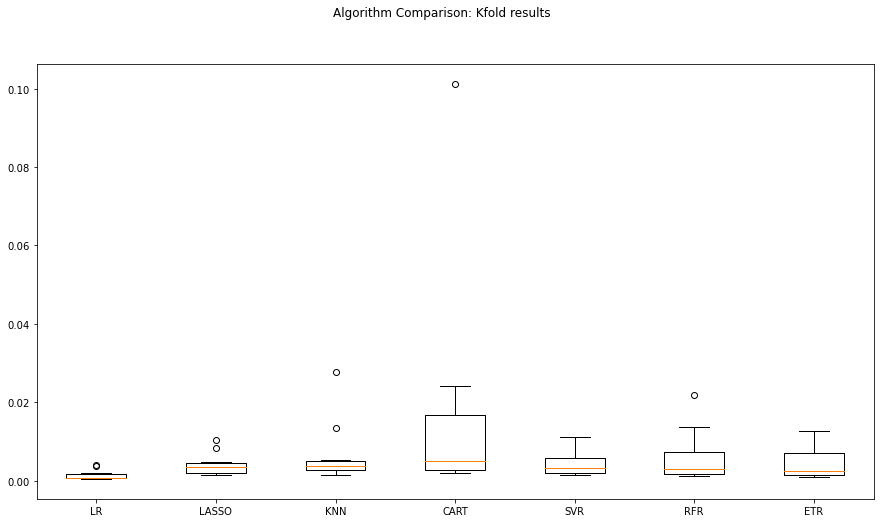

In [109]:

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

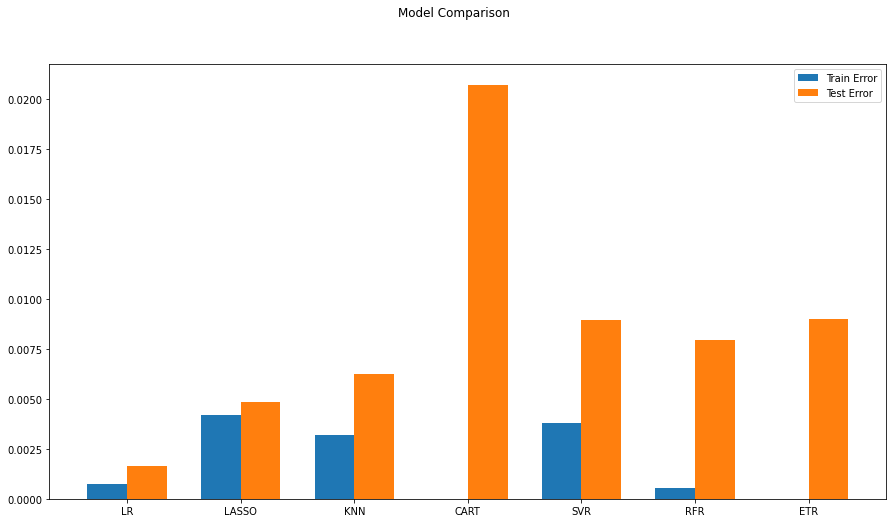

In [110]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

# First ARIMA Model

In [111]:
X_train_ARIMA=X_train.loc[:, ['TSLA_Open', 'TSLA_High', 'TSLA_Low','TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E',
       #'sentiment_vader','total_msgs'
       ]]
X_test_ARIMA=X_test.loc[:, ['TSLA_Open', 'TSLA_High', 'TSLA_Low','TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E',
       #'sentiment_vader','total_msgs'
       ]]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [112]:
modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [113]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.0011202836984835107

In [114]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA")


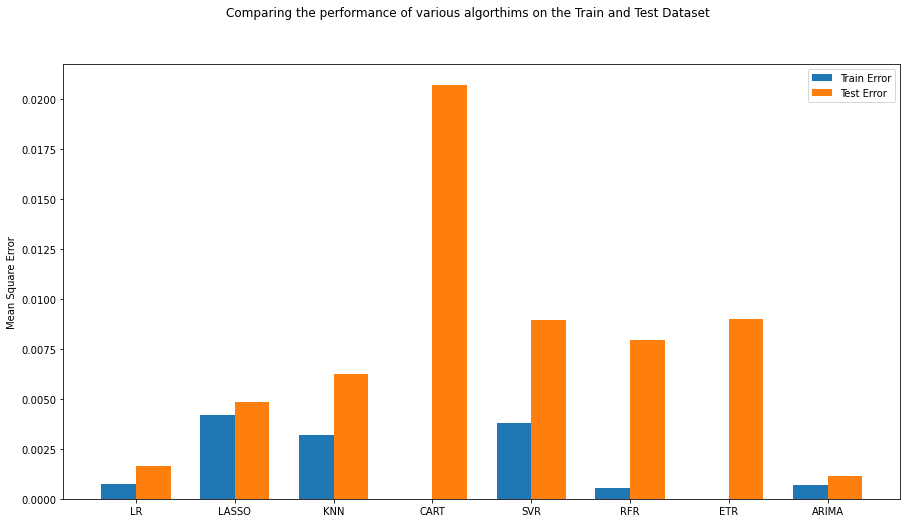

In [115]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LSTM and Time Series Based Models

In [116]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [117]:
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                validation_split=0.5,epochs=330, batch_size=72, verbose=0, shuffle=False)

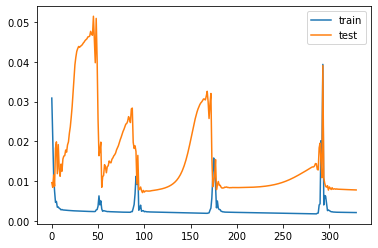

In [118]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [119]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

1/1 [==============================] - 0s 15ms/step


In [120]:
test_results.append(error_Test_LSTM)
train_results.append(error_Training_LSTM)
names.append("LSTM")

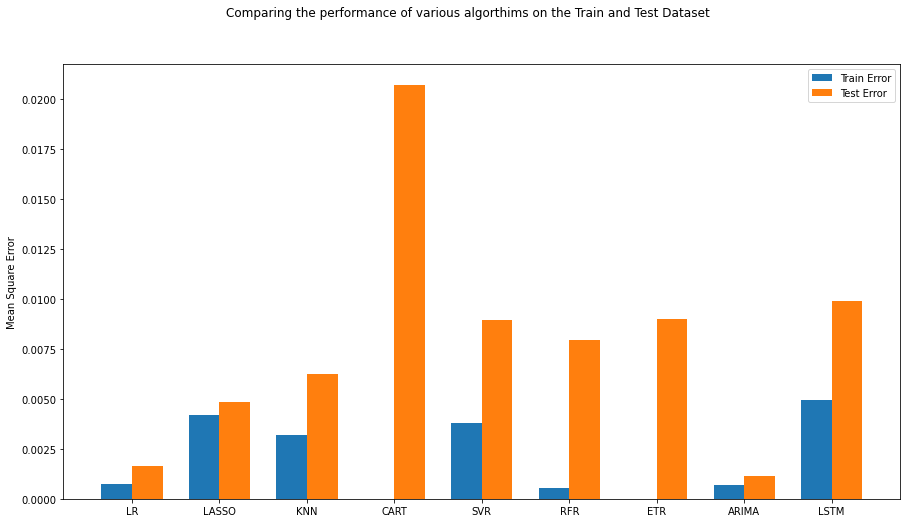

In [121]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [122]:
test_results

[0.001627931460216542,
 0.004848399627421507,
 0.006255032018337884,
 0.02073325679051346,
 0.008969653903843966,
 0.007972901270387744,
 0.00900275426683143,
 0.0011202836984835107,
 0.009913500918917233]

# Tune ARIMA Model

In [123]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values) 

ARIMA(0, 0, 0) MSE=0.0007636
ARIMA(0, 0, 1) MSE=0.0007007
ARIMA(0, 1, 0) MSE=0.0007959
ARIMA(0, 1, 1) MSE=0.0008741
ARIMA(1, 0, 0) MSE=0.0006839
ARIMA(1, 0, 1) MSE=0.0006963
ARIMA(1, 1, 0) MSE=0.0007738
ARIMA(1, 1, 1) MSE=0.0007587
ARIMA(2, 0, 0) MSE=0.0006808
ARIMA(2, 0, 1) MSE=0.0007634
ARIMA(2, 1, 0) MSE=0.0007577
ARIMA(2, 1, 1) MSE=0.0007598
Best ARIMA(2, 0, 0) MSE=0.0006808


In [124]:
# prepare model
modelARIMA_tuned=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()

In [125]:
# estimate accuracy on validation set
predicted_tuned = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0010960243884171191


In [126]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit_tuned.fittedvalues)
predicted = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.0010960243884171191

In [127]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA_tuned")


In [128]:
len(train_results)

10

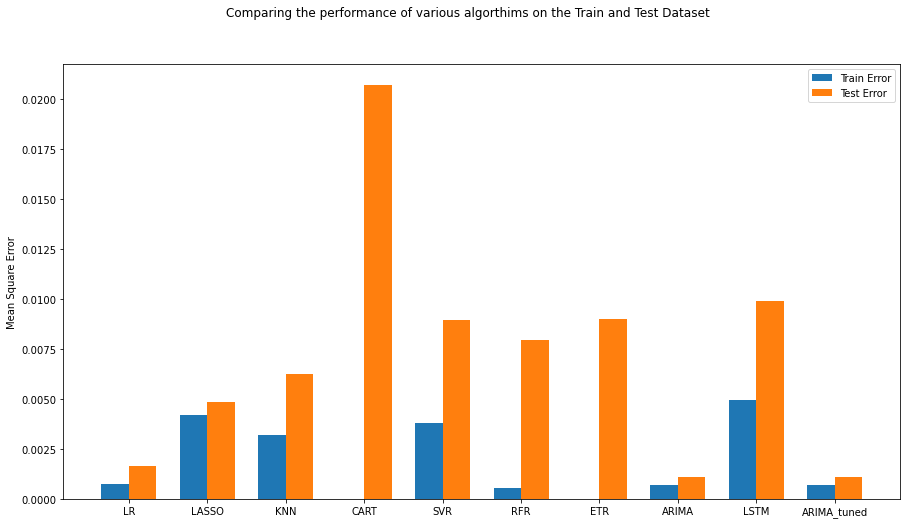

In [129]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LR Model - Stock, lagged return plots

In [130]:
 # Full Training period linear model
    
LRtest = LinearRegression().fit(X_train, Y_train)
train_result = mean_squared_error(LRtest.predict(X_train), Y_train)
    
# Test results
test_result = mean_squared_error(LRtest.predict(X_test), Y_test)



In [131]:
LRtest.coef_

array([-6.89444542e-01,  7.88380376e-01,  7.32512890e-01, -5.33037721e-05,
        4.45457730e-02,  8.69399018e-03, -2.53759537e-01, -1.02198425e-02,
       -1.54707999e-01, -1.01503125e-01,  2.51234441e-02,  3.53632573e-04,
       -2.12500573e-02,  2.59672833e-03,  2.14674040e-02, -1.73852150e-02,
        4.61029160e-03,  6.66245916e-03, -5.83491591e-02, -1.01555679e-02,
       -8.69996651e-04, -1.53855293e-02, -1.16627699e-02,  1.30052317e-02,
       -6.77055061e-02,  8.69399018e-03, -2.53759537e-01, -1.02198425e-02,
       -1.54707999e-01])

In [132]:
LRtest.intercept_

0.5219577816596381

In [133]:
res_LR = LRtest.predict(X_test)

In [134]:
s = Y_test.to_frame()
s['LM_predicted'] = res_LR
s

TSLA_AdjClose_pred  LM_predicted
dt                                          
2021-01-27           -0.028582     -0.072693
2021-02-01            0.014681      0.000055
2021-02-06           -0.048775     -0.055997
2021-02-11           -0.019206     -0.040568
2021-02-16           -0.018916     -0.036962
2021-02-21           -0.145506     -0.136202
2021-02-26           -0.033570     -0.075397
2021-03-03           -0.148604     -0.146721
2021-03-08            0.208803      0.085015
2021-03-13           -0.060261     -0.004592
2021-03-18            0.013685      0.021482
2021-03-23           -0.067870     -0.059397
2021-03-28            0.067251      0.032144
2021-04-02            0.013837      0.005826
2021-04-07            0.045181      0.019742
2021-04-12            0.052448      0.038339
2021-04-17           -0.027532     -0.004820
2021-04-22           -0.020992     -0.055913
2021-04-27            0.006647     -0.042652
2021-05-02           -0.053667     -0.074919
2021-05-07           -0.130873     -0.129522
2021-05-12           -0.022388     -0.056426
2021-05-17            0.006997     -0.034894
2021-05-22            0.082524      0.009391
2021-05-27           -0.011078     -0.030157
2021-06-01           -0.040645     -0.064125
2021-06-06            0.017934     -0.027844
2021-06-11           -0.008265     -0.054300
2021-06-16            0.026044     -0.016370
2021-06-21            0.079008      0.026869
2021-06-26            0.008964     -0.038905
2021-07-01           -0.027426     -0.069169

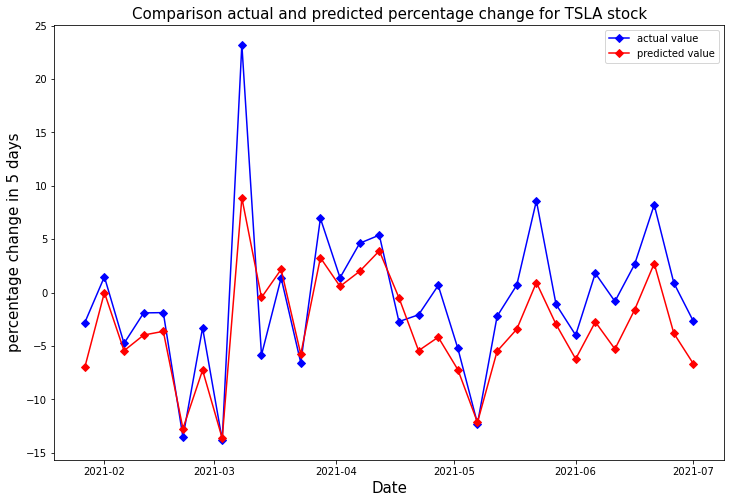

In [135]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "predicted value", color = 'red', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
pyplot.legend()
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM Model - Stock, lagged return plots

In [136]:
res_LSTM = predicted.copy()
# res_LSTM.tolist() # works for javier.

In [137]:
s['LSTM_predicted'] = res_LSTM
s

TSLA_AdjClose_pred  LM_predicted  LSTM_predicted
dt                                                          
2021-01-27           -0.028582     -0.072693       -0.074225
2021-02-01            0.014681      0.000055        0.003721
2021-02-06           -0.048775     -0.055997       -0.052754
2021-02-11           -0.019206     -0.040568       -0.035290
2021-02-16           -0.018916     -0.036962       -0.031718
2021-02-21           -0.145506     -0.136202       -0.137714
2021-02-26           -0.033570     -0.075397       -0.059394
2021-03-03           -0.148604     -0.146721       -0.140991
2021-03-08            0.208803      0.085015        0.113375
2021-03-13           -0.060261     -0.004592        0.010015
2021-03-18            0.013685      0.021482        0.040381
2021-03-23           -0.067870     -0.059397       -0.047355
2021-03-28            0.067251      0.032144        0.048324
2021-04-02            0.013837      0.005826        0.014706
2021-04-07            0.045181      0.019742        0.030629
2021-04-12            0.052448      0.038339        0.051249
2021-04-17           -0.027532     -0.004820        0.005018
2021-04-22           -0.020992     -0.055913       -0.049207
2021-04-27            0.006647     -0.042652       -0.038439
2021-05-02           -0.053667     -0.074919       -0.075470
2021-05-07           -0.130873     -0.129522       -0.132386
2021-05-12           -0.022388     -0.056426       -0.048395
2021-05-17            0.006997     -0.034894       -0.019278
2021-05-22            0.082524      0.009391        0.028097
2021-05-27           -0.011078     -0.030157       -0.017803
2021-06-01           -0.040645     -0.064125       -0.050382
2021-06-06            0.017934     -0.027844       -0.011133
2021-06-11           -0.008265     -0.054300       -0.044096
2021-06-16            0.026044     -0.016370       -0.003021
2021-06-21            0.079008      0.026869        0.045380
2021-06-26            0.008964     -0.038905       -0.030544
2021-07-01           -0.027426     -0.069169       -0.064765

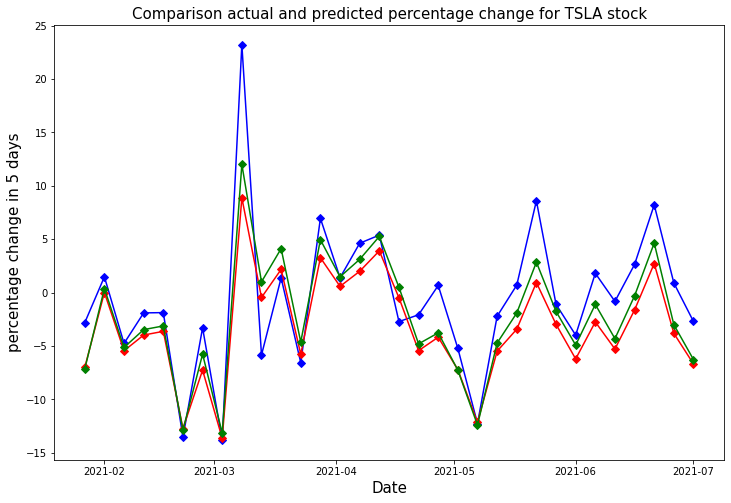

In [138]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM with hyperparameter tuning


In [86]:
def buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate):

    layer1 = tf.keras.layers.Input(shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])) #seq length, input size
    # layer2 = tf.keras.layers.Embedding(input_dim=6,output_dim=64,input_length= 15000)(layer1)
    layerX = tf.keras.layers.LSTM(50, activation = 'relu') (layer1)
    for f in range(densenumber):
        layer6 = tf.keras.layers.Dense(denselayersize,activation="relu")(layerX)
        layer7 = tf.keras.layers.Dropout(dropoutrate)(layer6)
        layerX = tf.keras.layers.BatchNormalization()(layer7)
    output = tf.keras.layers.Dense(1, activation="linear" )(layerX)
    model = tf.keras.Model(inputs=layer1,outputs=output)
    model.compile(loss=["MSE"],optimizer=optimizer) 
    return model

In [87]:
dictionary =  dict(layer1= [ "LSTM"], 
                  densenumber = [2, 4, 6, 8],
                  denselayersize = [8, 16, 32, 64],
                  optimizer =["adam", "rmsprop", "SGD"],
                  dropoutrate = [0.2, 0.4, 0.8]
                  )

In [88]:
iterate = 0
model_dict = {}
for layer in dictionary["layer1"]:
    for densenumber in dictionary["densenumber"]:
        for denselayersize in dictionary["denselayersize"]:
            for optimizer in dictionary["optimizer"]:
                for dropoutrate in dictionary["dropoutrate"]:
                    tf.keras.backend.clear_session()
                    tf.random.set_seed(1)

                    model= buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate)
                    
                    model_history = model.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=80, batch_size=72, verbose=0, shuffle=False)
                    predictions=model.predict(X_test_LSTM)
                    # y_val = Y_test_LSTM
                    # predictions2 = pd.DataFrame(predictions)                        
                    
                    # Y_3 = pd.DataFrame(y_val)
                    # correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

                    hist = model_history.history
                    error_Training_LSTM = mean_squared_error(Y_train_LSTM, model.predict(X_train_LSTM))
                    predicted = model.predict(X_test_LSTM)
                    error_Test_LSTM = mean_squared_error(Y_test, predicted)
                    
                    # test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
                    test_rmse = np.sqrt(error_Test_LSTM)
                    
                    model_dict[iterate]= dict(layer= layer, densenumber = densenumber, denselayersize=denselayersize, optimizer= optimizer,dropoutrate= dropoutrate, 
                    predictions = predictions, history = hist, MSE_Training = error_Training_LSTM, MSE_Test = error_Test_LSTM, RMSE_Test = test_rmse
                    )
                    iterate += 1    

                    
                   
              
        

1/1 [==============================] - 0s 16ms/step


In [89]:
model_dict

{0: {'layer': 'LSTM',
  'densenumber': 2,
  'denselayersize': 8,
  'optimizer': 'adam',
  'dropoutrate': 0.2,
  'predictions': array([[-0.3859848 ],
         [-0.33754095],
         [-0.35872754],
         [-0.2995251 ],
         [-0.2423772 ],
         [-0.23697181],
         [-0.25614268],
         [-0.23815817],
         [-0.19029339],
         [-0.37576702],
         [-0.4384086 ],
         [-0.41759887],
         [-0.309266  ],
         [-0.3551039 ],
         [-0.39609373],
         [-0.45611003],
         [-0.45130304],
         [-0.388878  ],
         [-0.3559235 ],
         [-0.31680816],
         [-0.2491306 ],
         [-0.11792805],
         [-0.21368827],
         [-0.25898105],
         [-0.34056312],
         [-0.3987206 ],
         [-0.3601232 ],
         [-0.31630254],
         [-0.30522034],
         [-0.3380134 ],
         [-0.36393532],
         [-0.37307248]], dtype=float32),
  'history': {'loss': [1.019377589225769,
    1.0229682922363281,
    0.8109579086303711,


In [90]:
model_pd = pd.DataFrame(model_dict).transpose().sort_values(by="MSE_Test")

In [91]:
model_pd.sort_values(by="MSE_Test")

layer densenumber denselayersize optimizer dropoutrate  \
112  LSTM           8              8   rmsprop         0.4   
101  LSTM           6             64      adam         0.8   
24   LSTM           2             32       SGD         0.2   
95   LSTM           6             32   rmsprop         0.8   
59   LSTM           4             32   rmsprop         0.8   
..    ...         ...            ...       ...         ...   
27   LSTM           2             64      adam         0.2   
21   LSTM           2             32   rmsprop         0.2   
3    LSTM           2              8   rmsprop         0.2   
0    LSTM           2              8      adam         0.2   
12   LSTM           2             16   rmsprop         0.2   

                                           predictions  \
112  [[-0.0069532185], [-0.019844506], [-0.00808423...   
101  [[-0.0095667485], [-0.009498291], [-0.00975601...   
24   [[-0.0073887995], [-0.010219521], [-0.00452391...   
95   [[-0.0044908905], [-0.004646388], [-0.00474001...   
59   [[-0.012926582], [-0.013549142], [-0.01274557]...   
..                                                 ...   
27   [[-0.19921054], [-0.19137712], [-0.21504301], ...   
21   [[0.19457524], [0.20036705], [0.22662337], [0....   
3    [[-0.27153188], [-0.25476214], [-0.2760667], [...   
0    [[-0.3859848], [-0.33754095], [-0.35872754], [...   
12   [[0.96966004], [1.1242235], [1.0164447], [0.98...   

                                               history MSE_Training  MSE_Test  \
112  {'loss': [1.2460808753967285, 1.41085362434387...     0.004471  0.004523   
101  {'loss': [1.509434461593628, 1.736945033073425...      0.00451  0.004575   
24   {'loss': [1.4737060070037842, 1.08294725418090...       0.0045   0.00458   
95   {'loss': [1.8104459047317505, 1.61399722099304...      0.00429  0.004581   
59   {'loss': [1.844003677368164, 1.656638026237487...      0.00469  0.004596   
..                                                 ...          ...       ...   
27   {'loss': [2.03867769241333, 1.1591743230819702...     0.013055  0.041064   
21   {'loss': [1.680234432220459, 1.229916214942932...     0.039063  0.052376   
3    {'loss': [0.9077982306480408, 0.88138389587402...     0.008766  0.061336   
0    {'loss': [1.019377589225769, 1.022968292236328...     0.018322  0.111871   
12   {'loss': [1.3252912759780884, 1.23278570175170...     0.485695  1.277873   

    RMSE_Test  
112  0.067255  
101  0.067642  
24   0.067673  
95   0.067685  
59   0.067793  
..        ...  
27   0.202644  
21   0.228857  
3    0.247661  
0    0.334472  
12   1.130431  

[144 rows x 10 columns]

In [92]:
model_pd.to_csv('lstm_hyperparameter_tuning.csv')

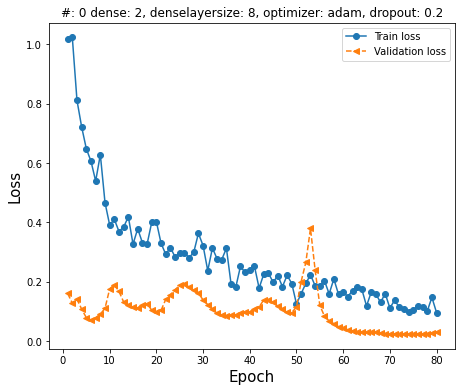

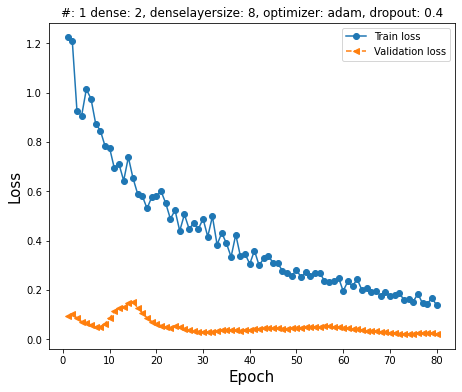

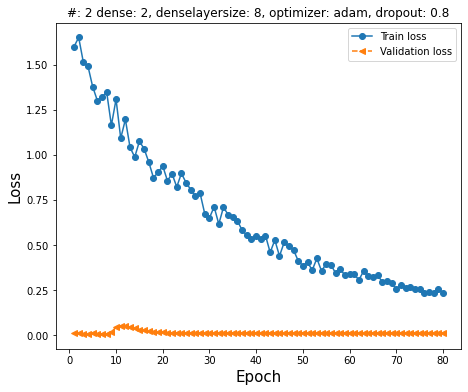

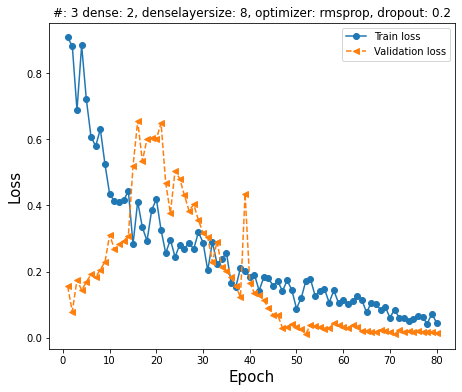

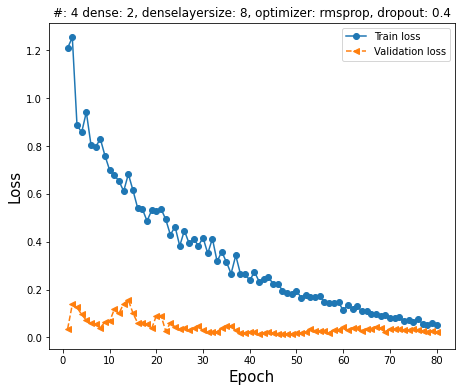

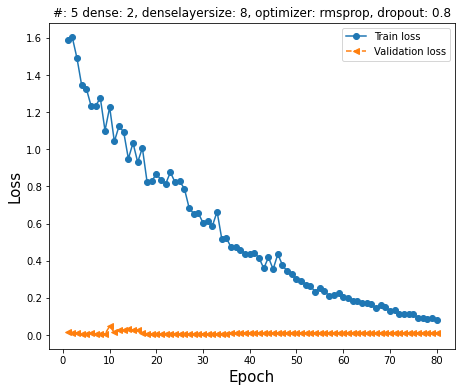

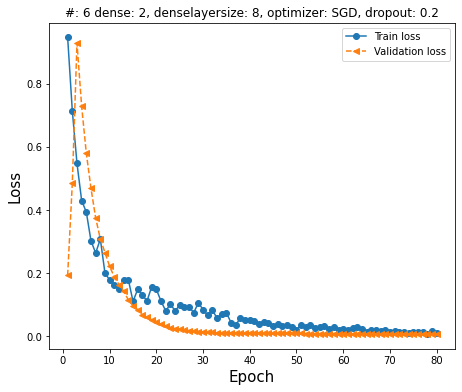

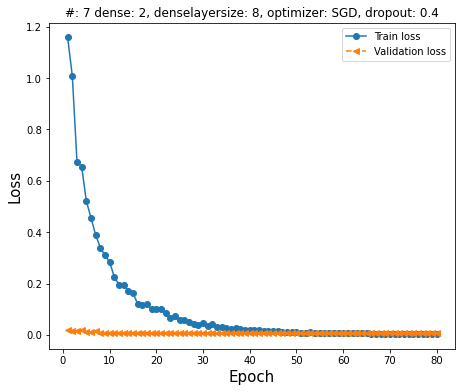

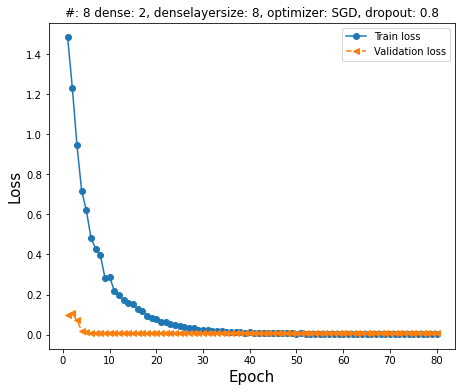

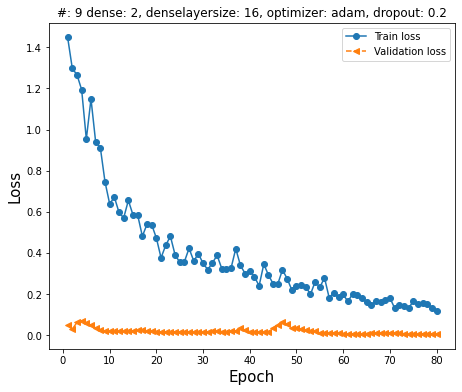

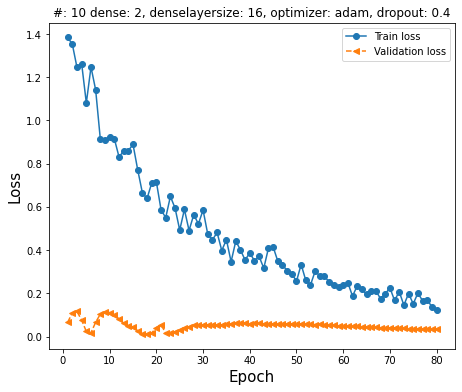

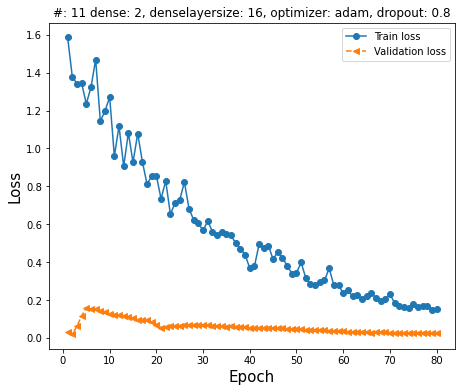

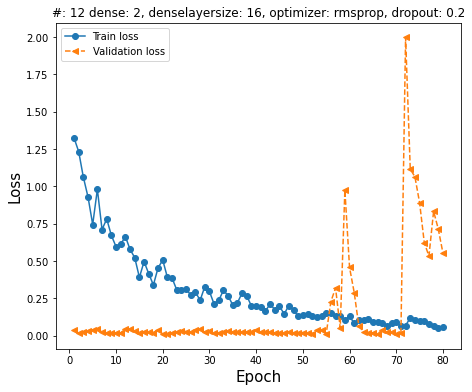

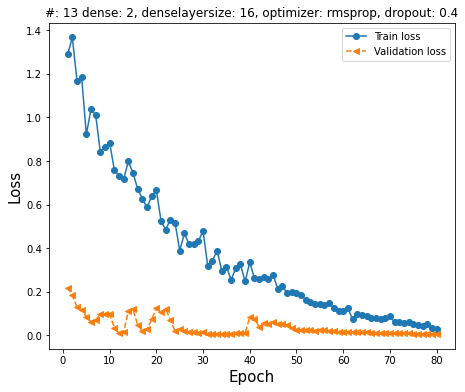

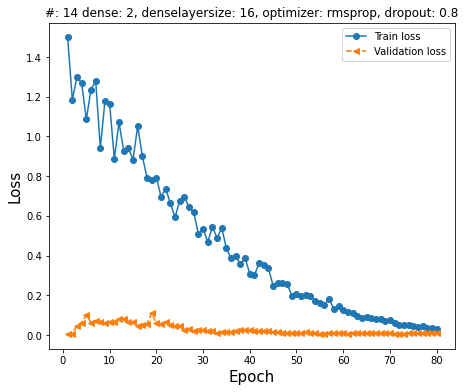

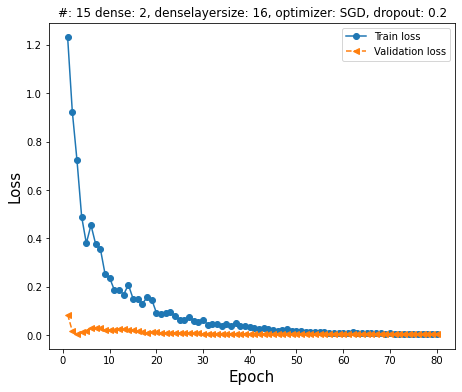

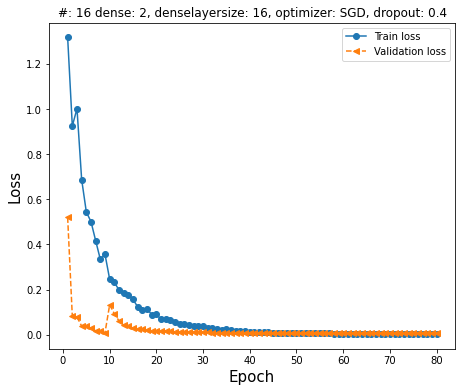

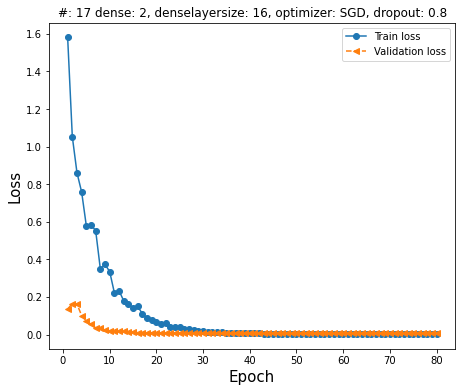

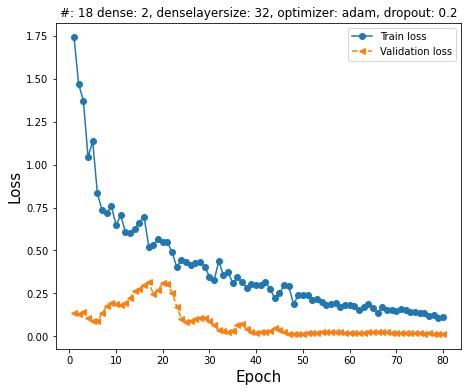

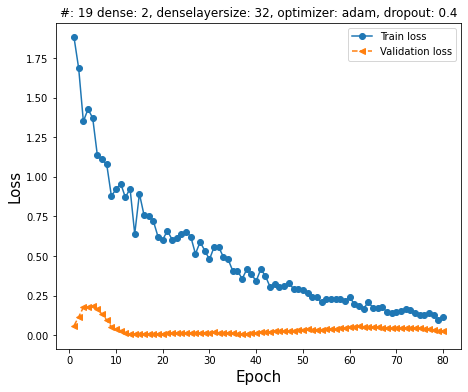

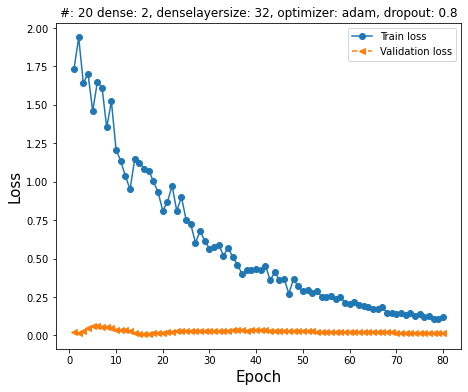

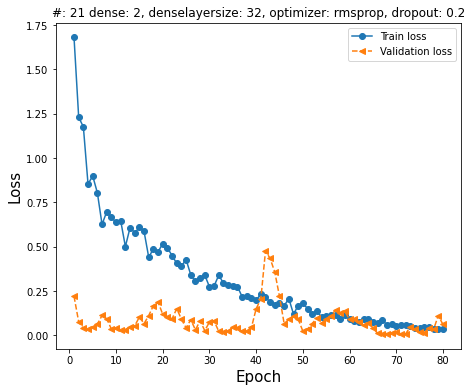

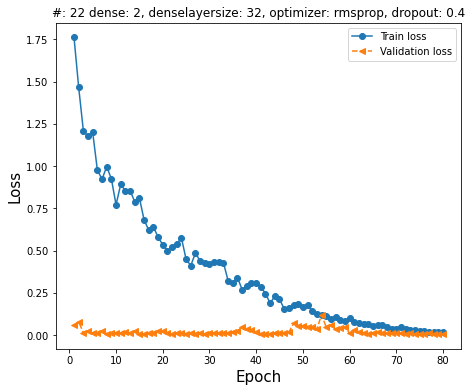

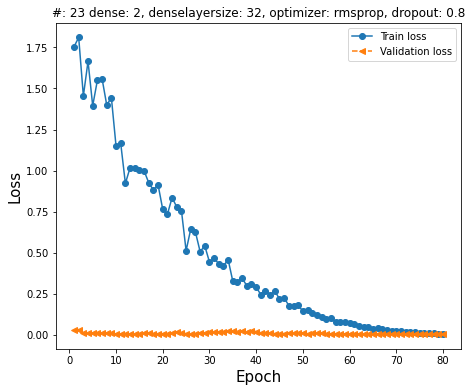

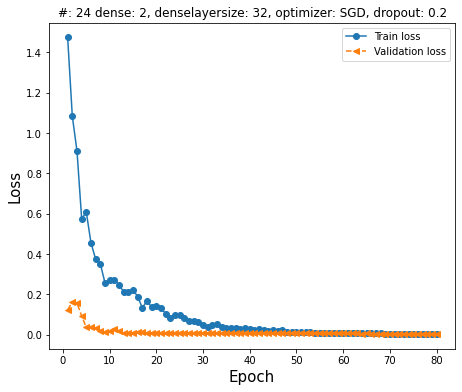

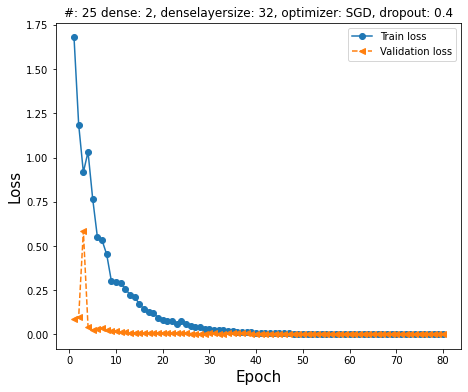

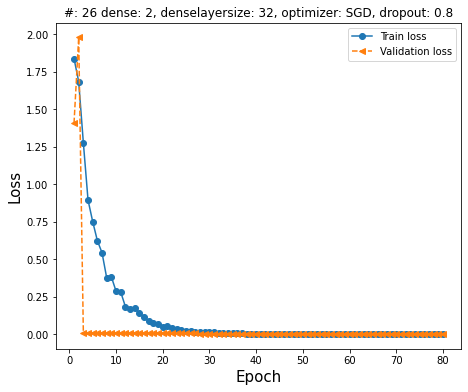

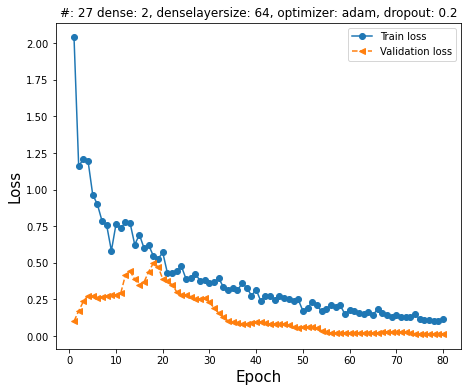

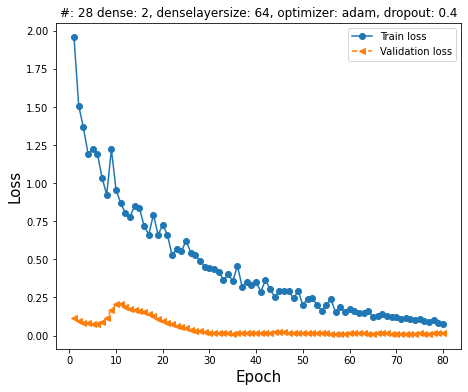

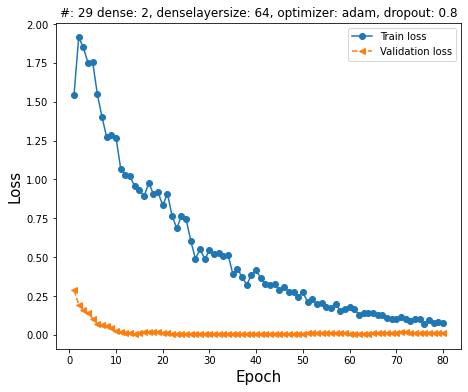

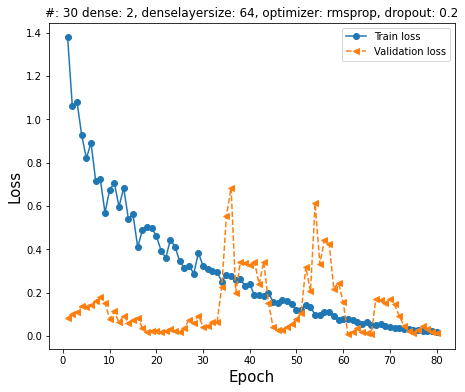

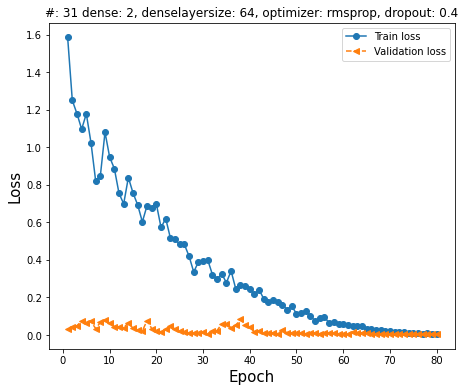

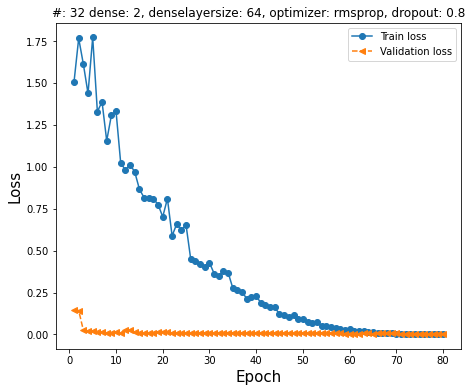

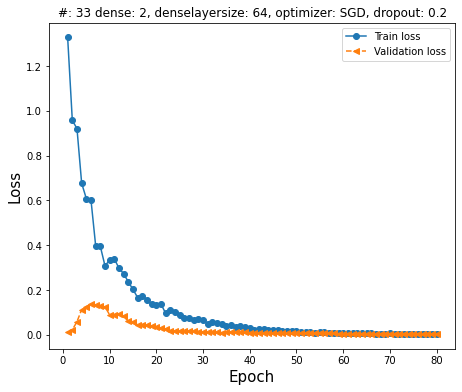

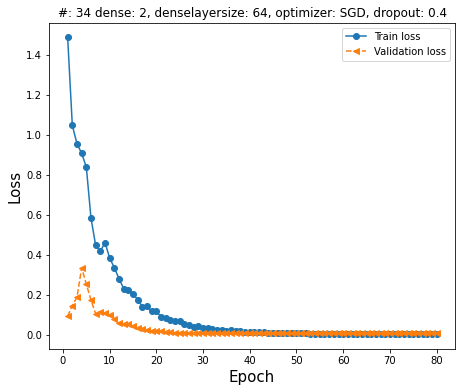

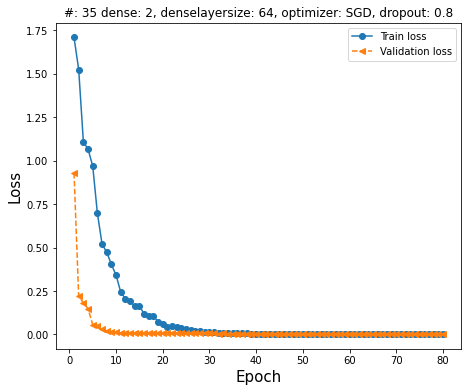

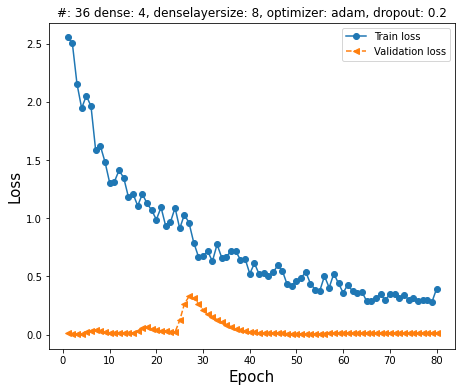

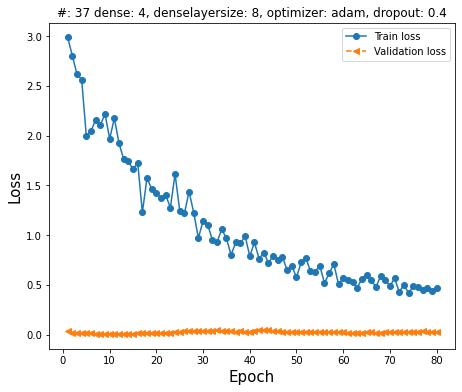

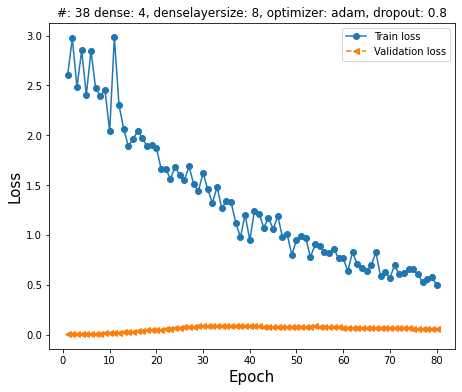

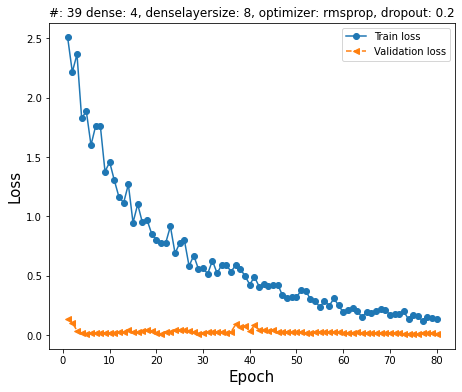

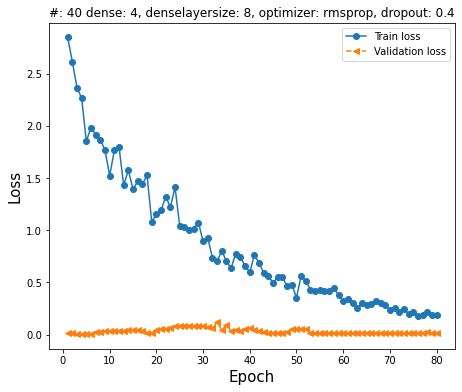

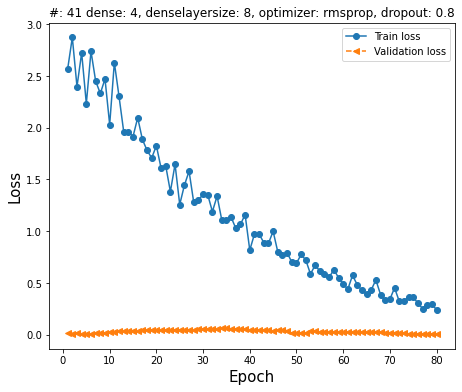

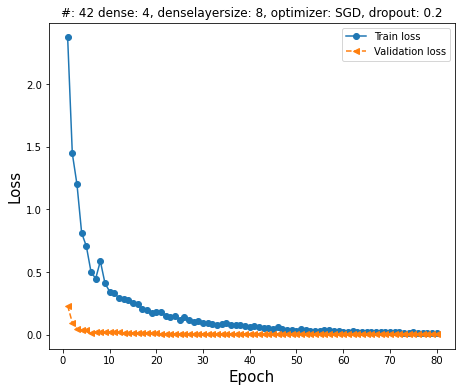

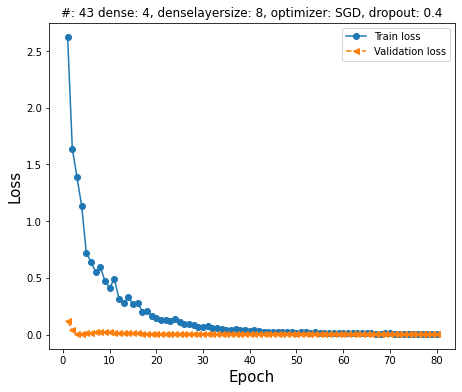

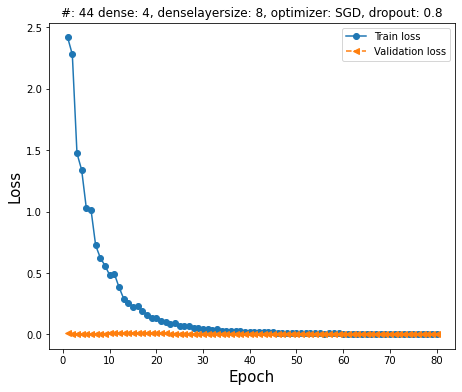

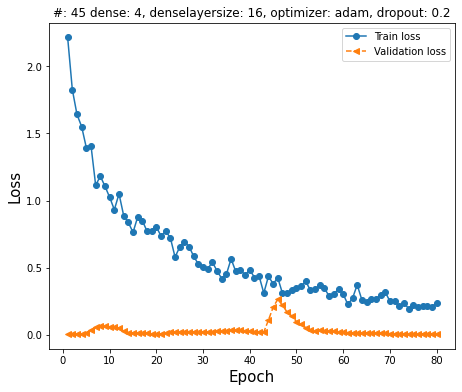

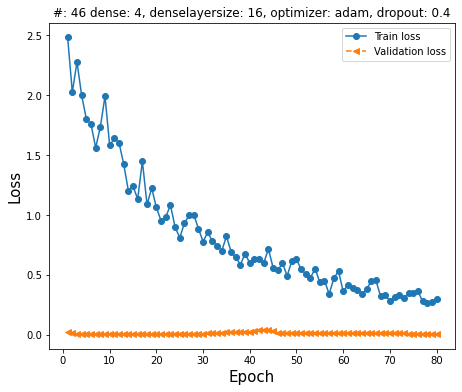

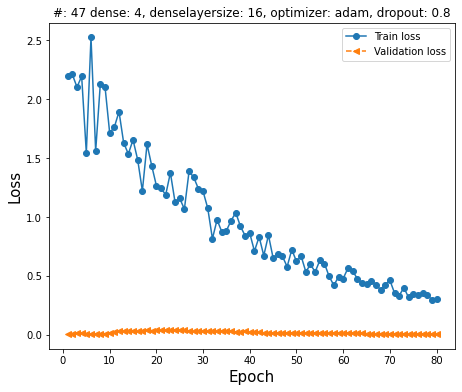

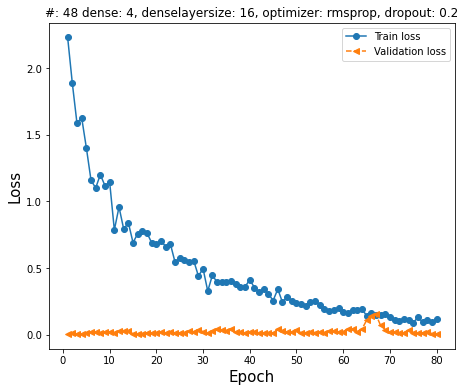

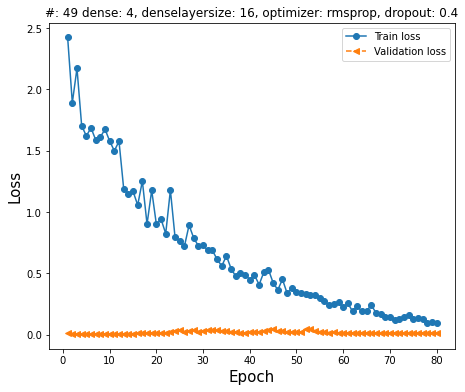

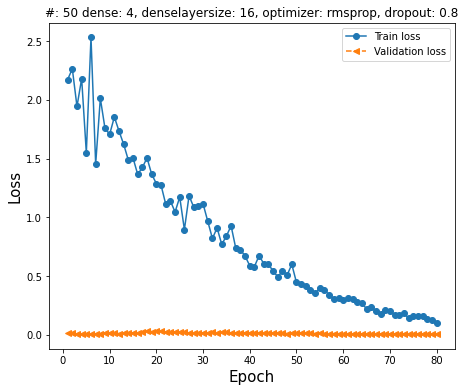

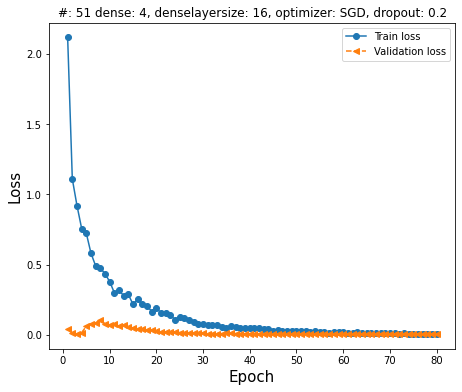

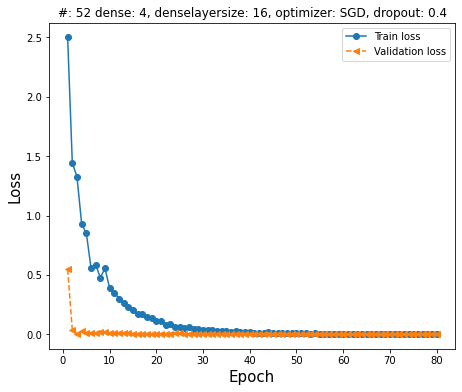

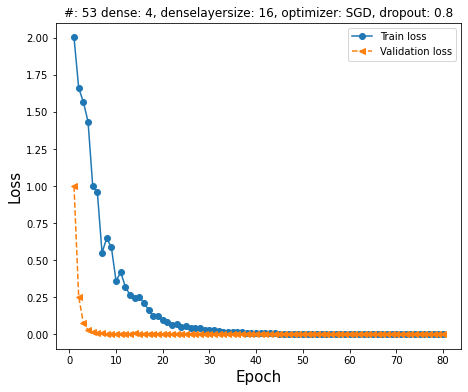

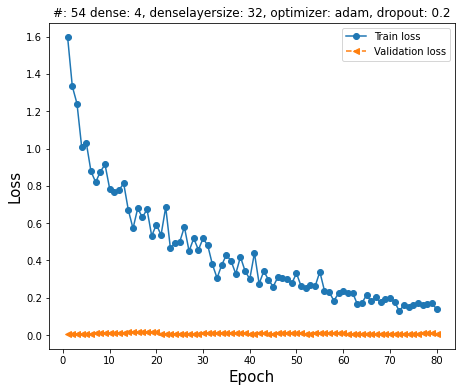

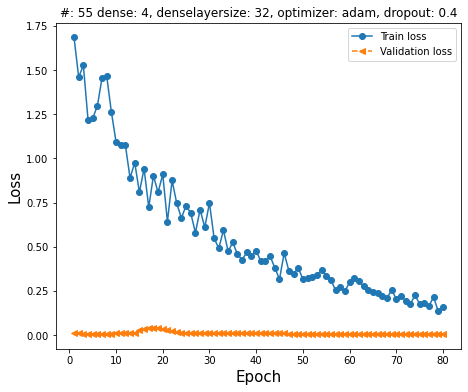

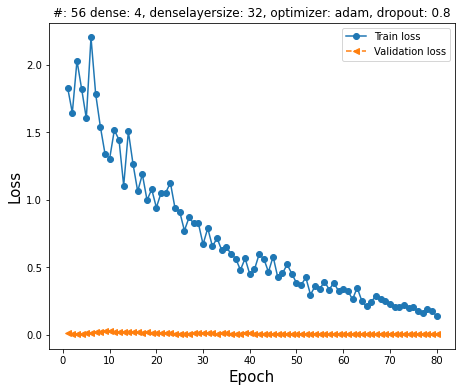

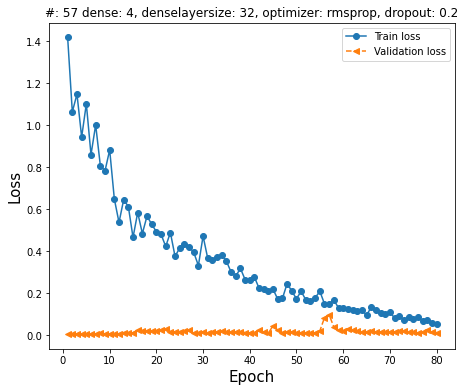

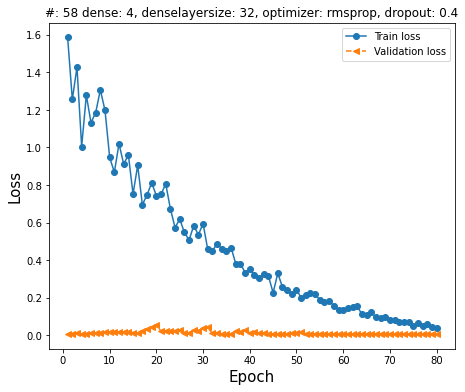

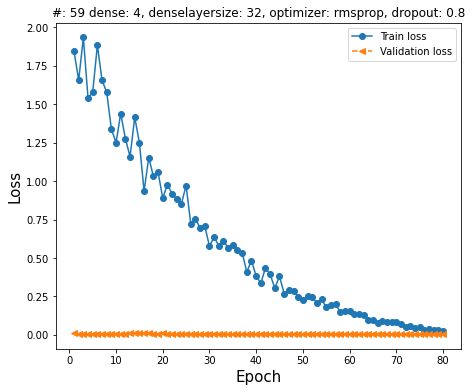

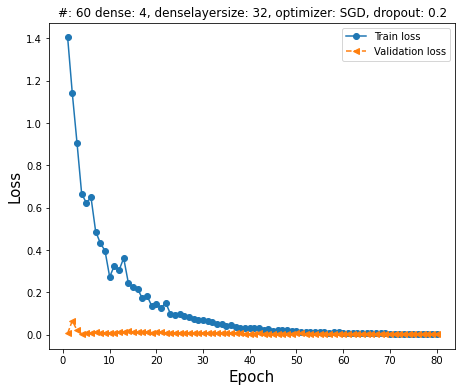

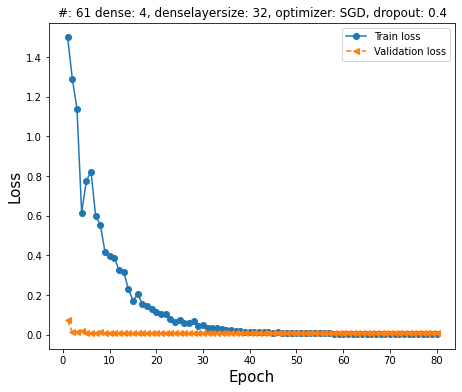

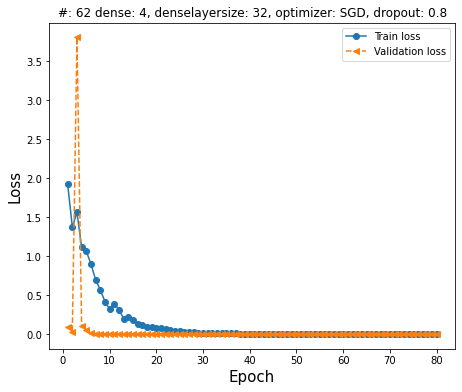

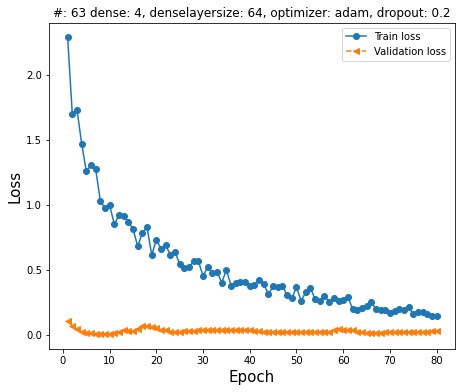

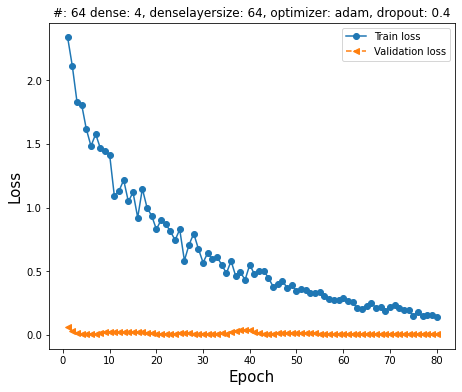

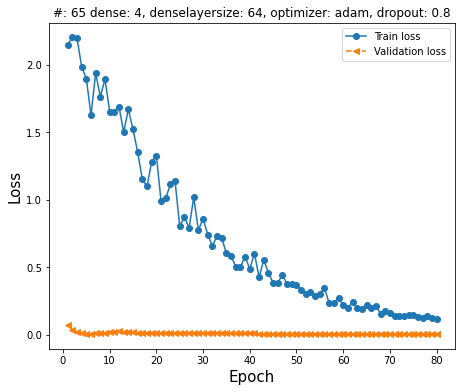

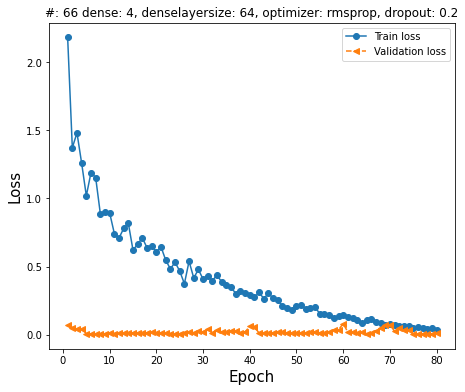

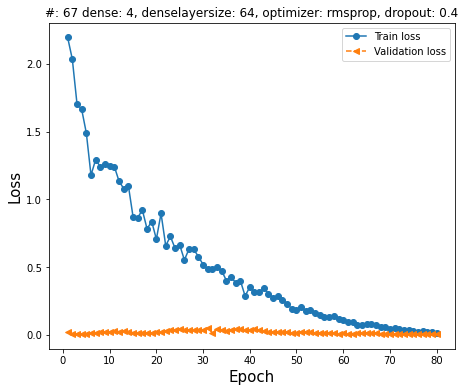

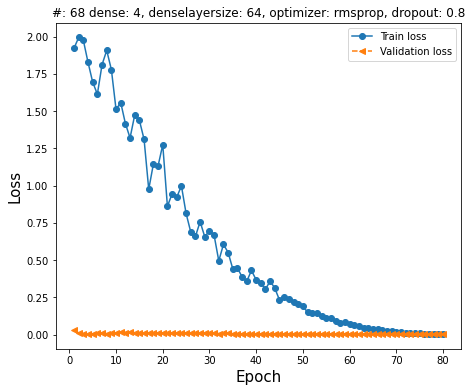

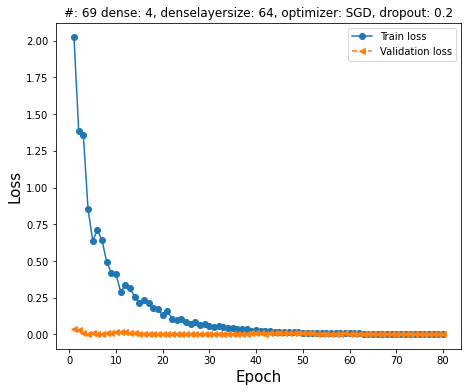

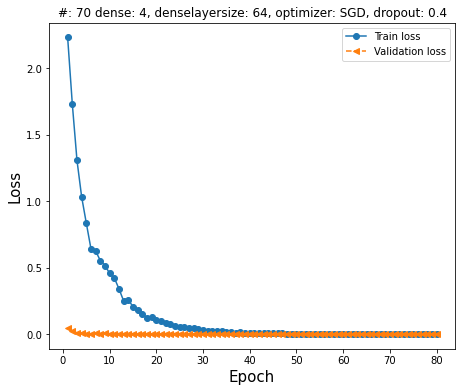

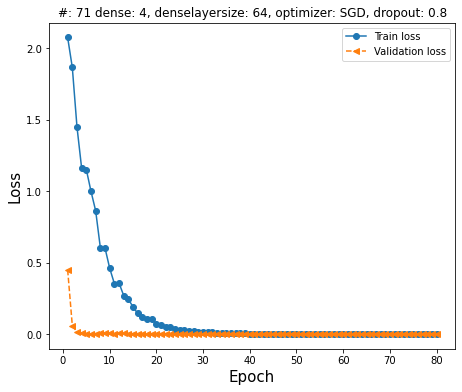

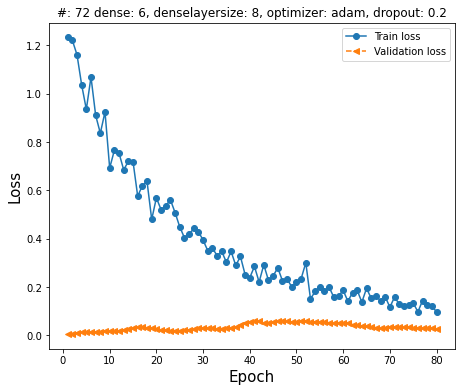

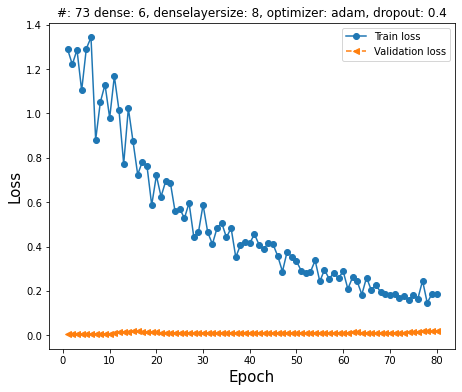

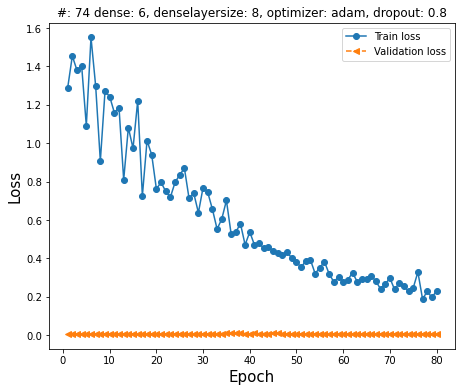

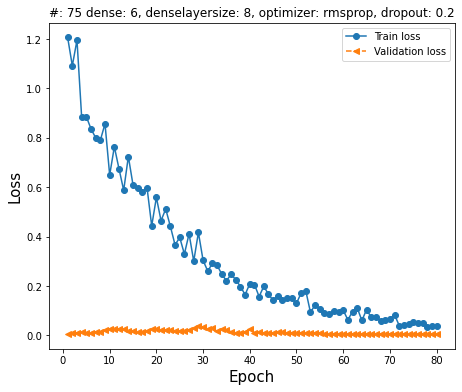

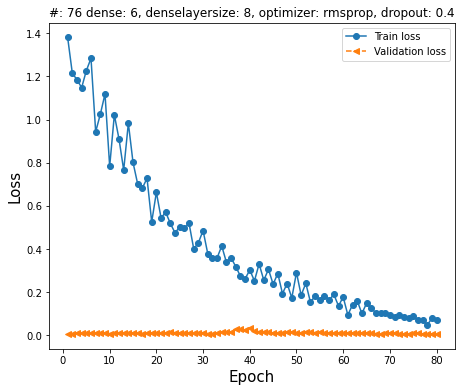

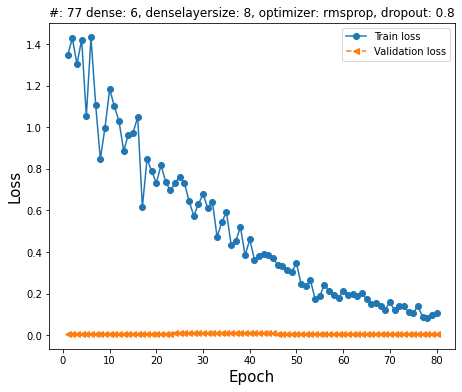

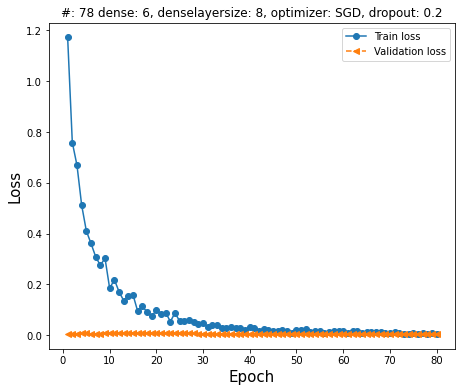

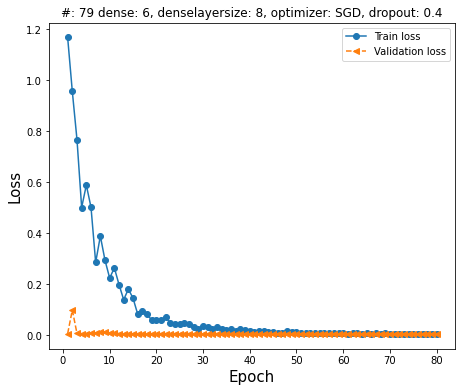

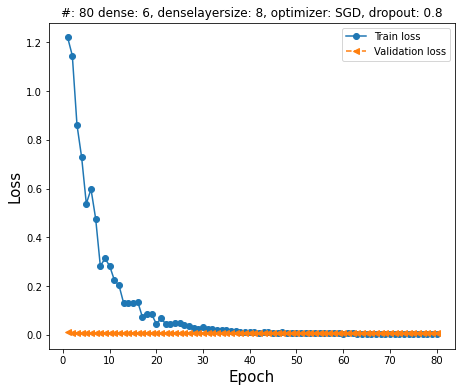

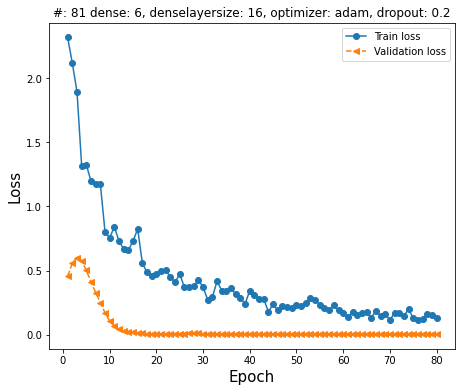

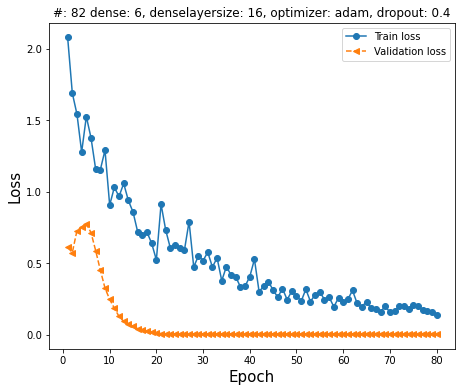

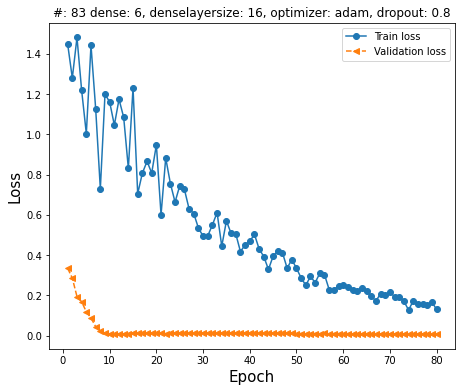

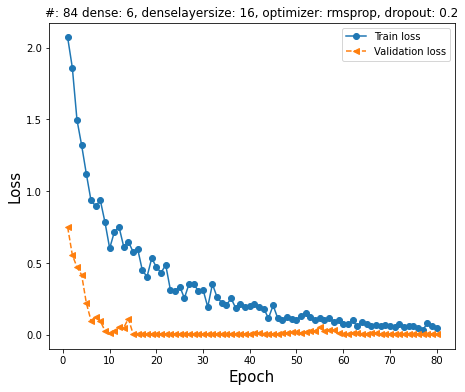

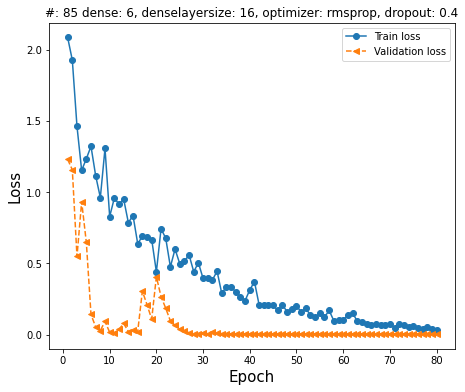

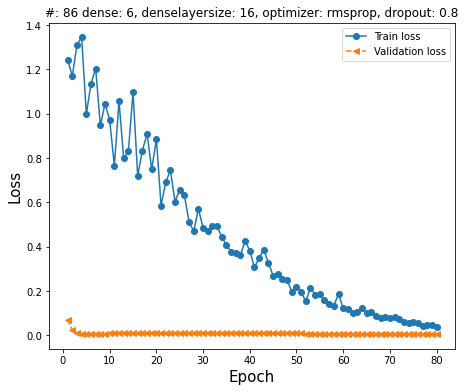

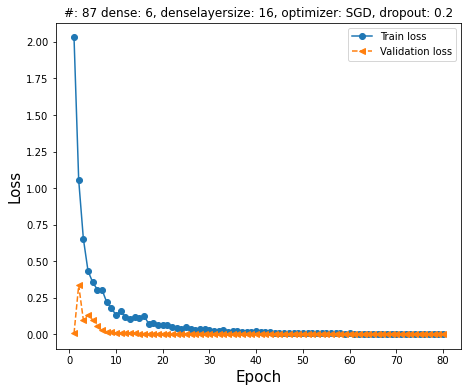

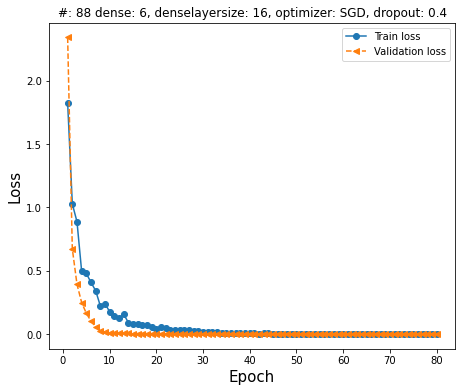

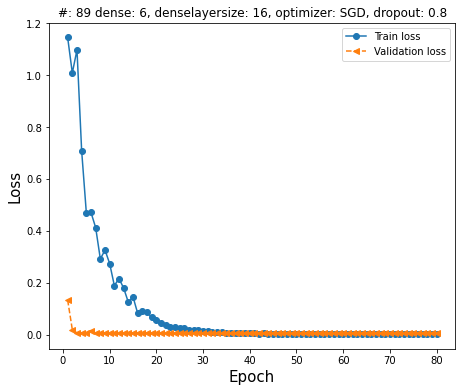

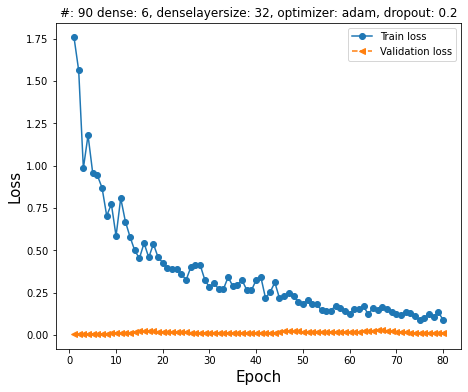

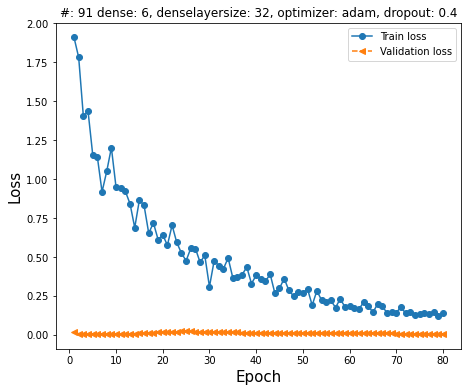

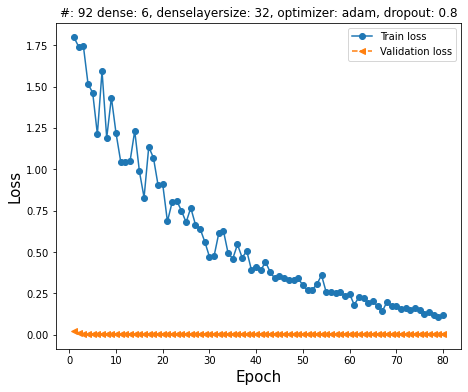

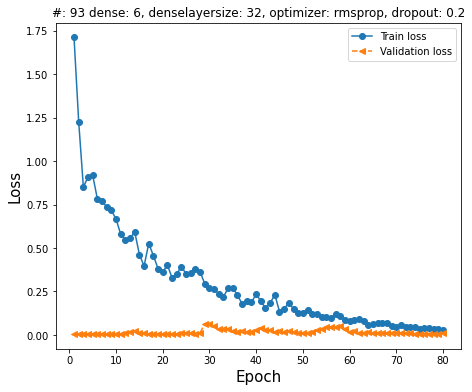

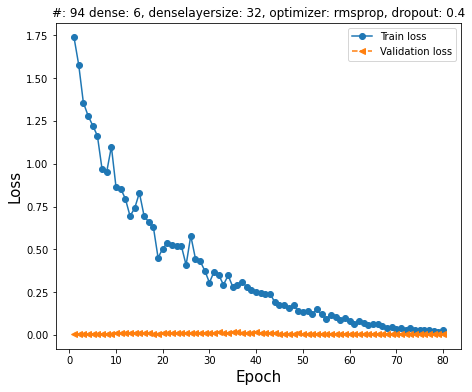

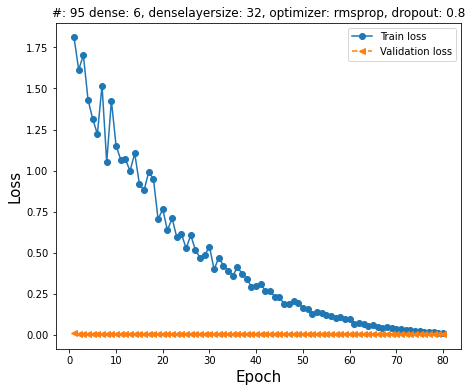

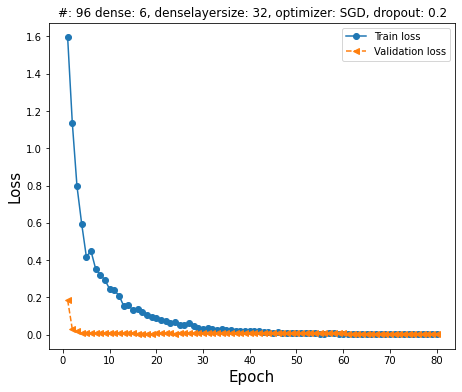

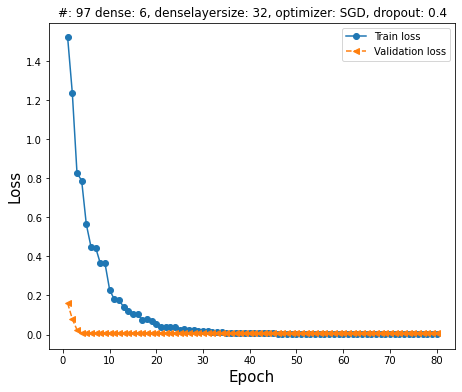

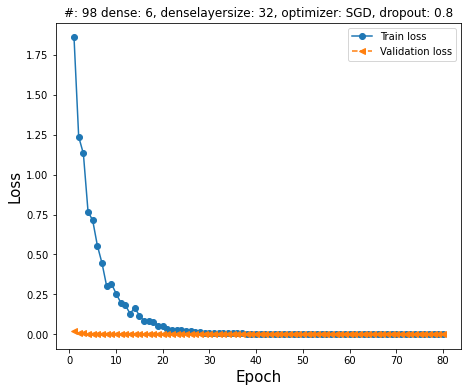

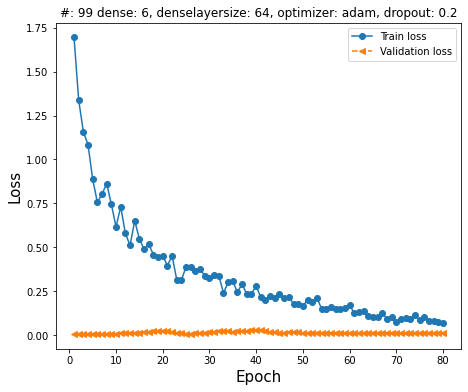

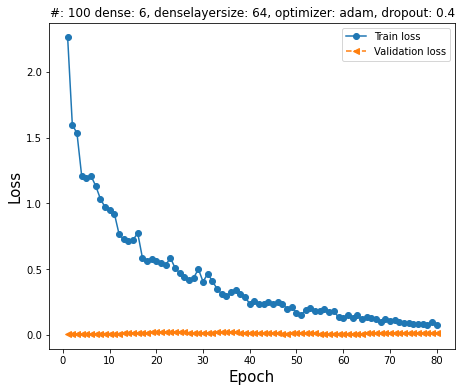

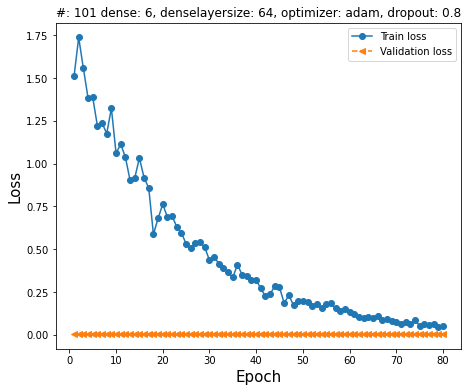

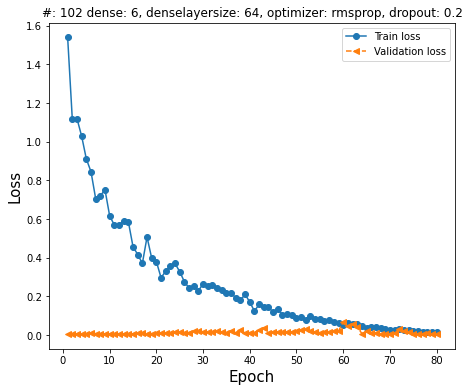

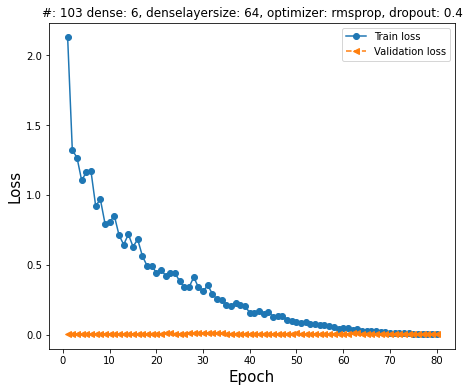

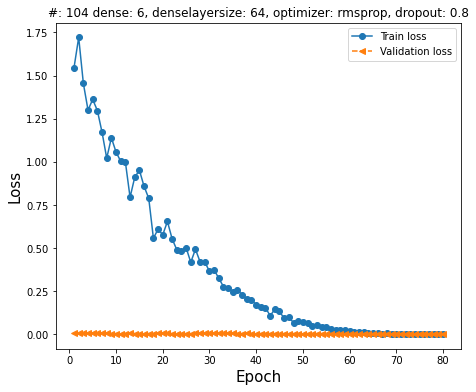

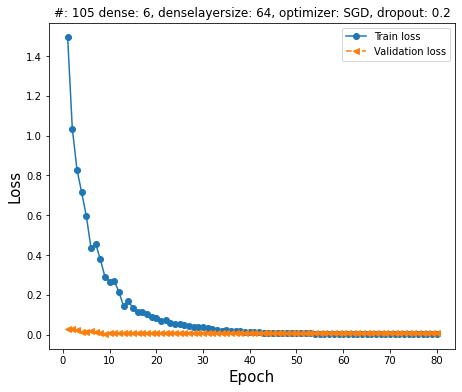

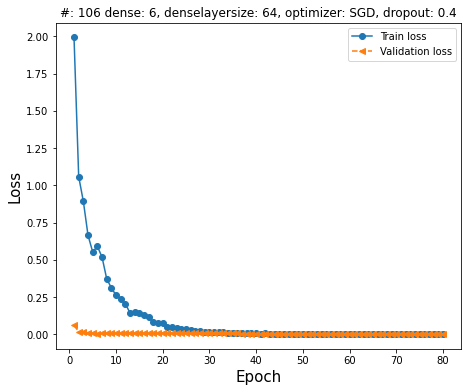

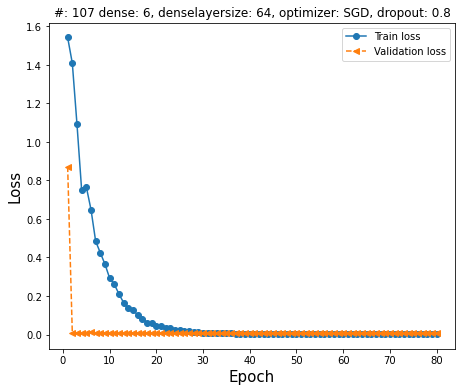

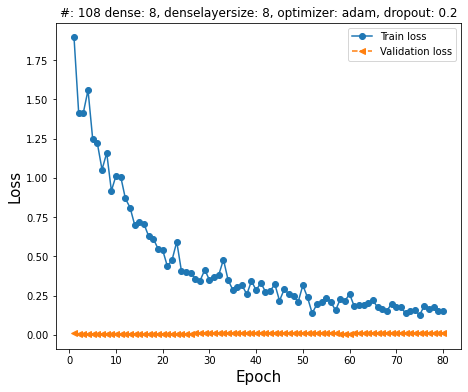

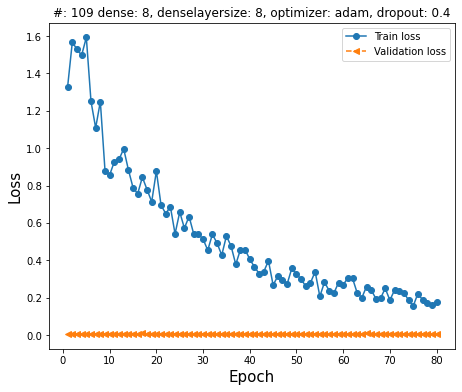

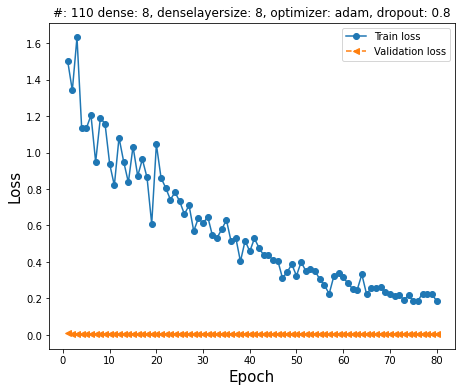

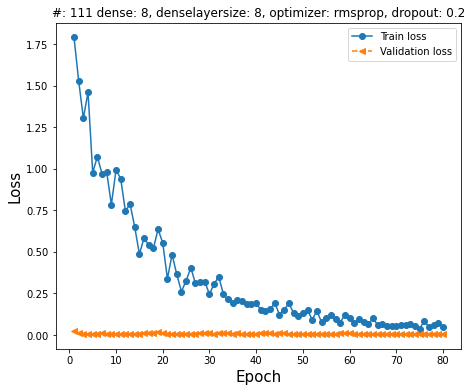

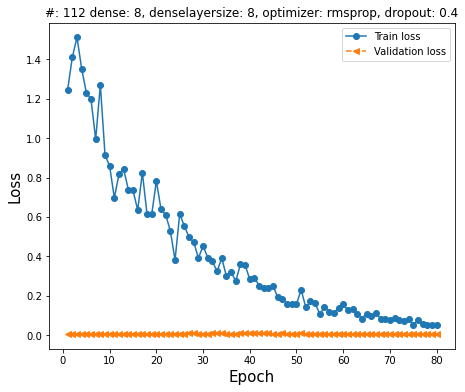

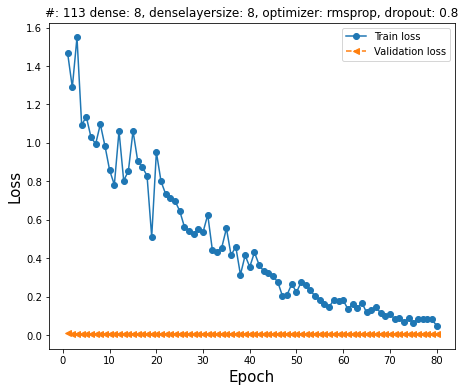

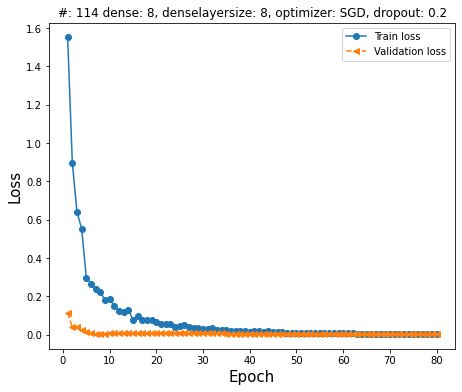

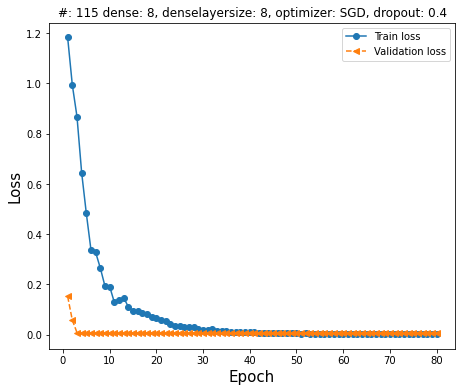

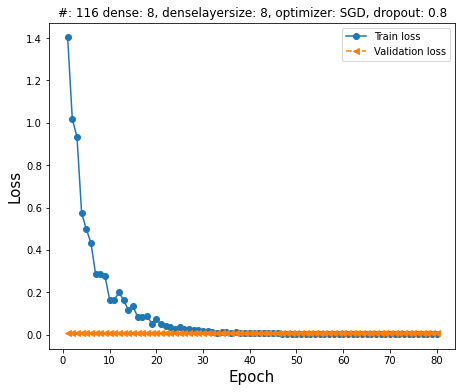

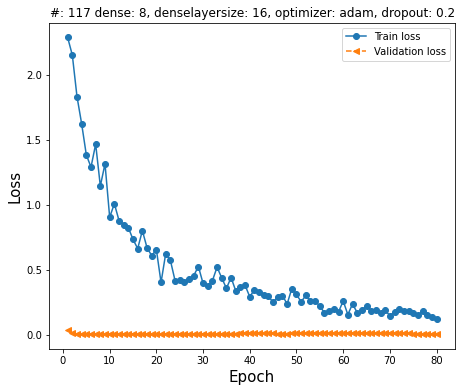

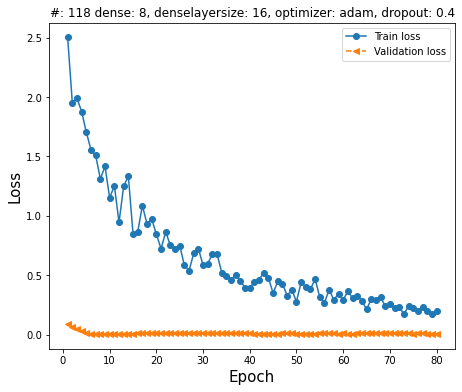

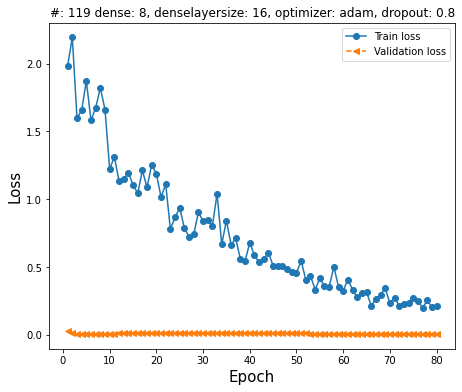

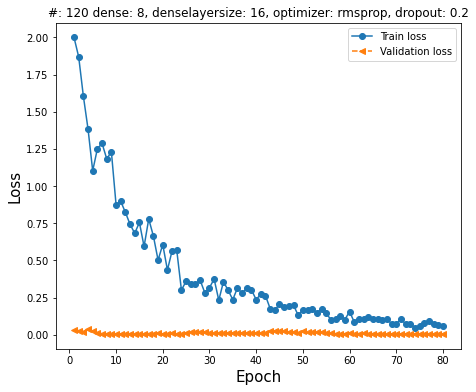

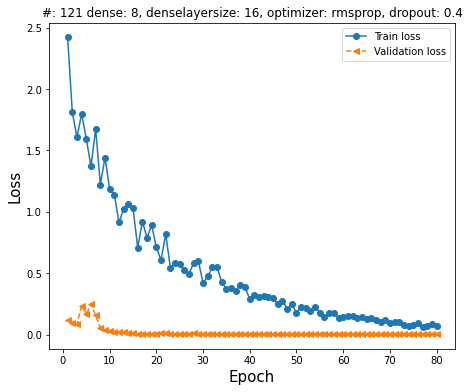

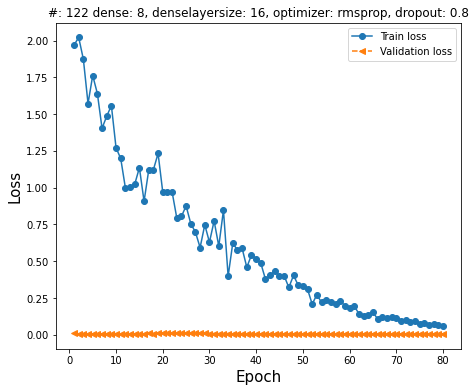

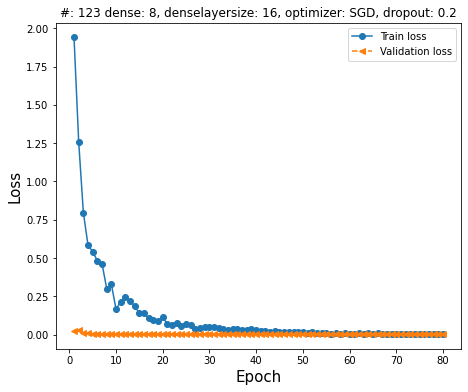

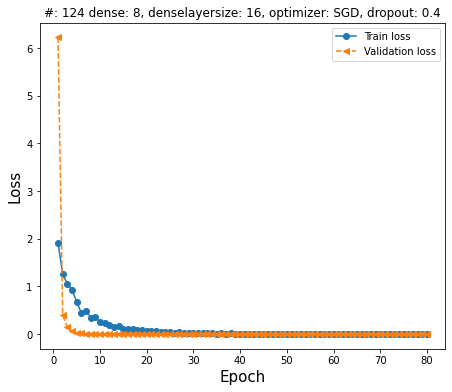

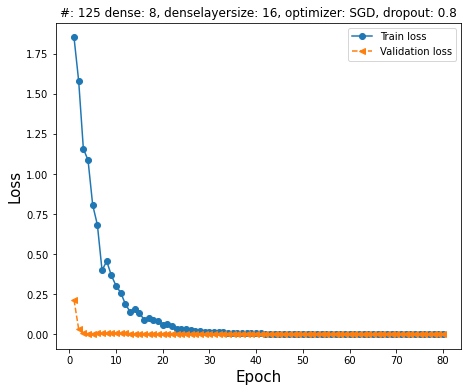

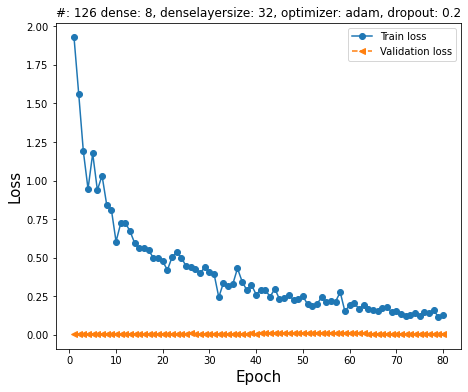

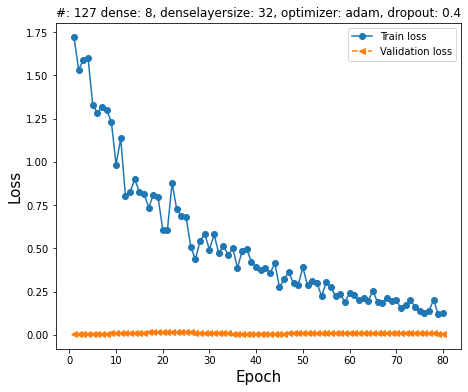

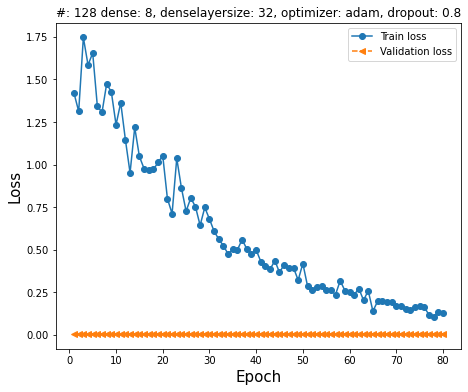

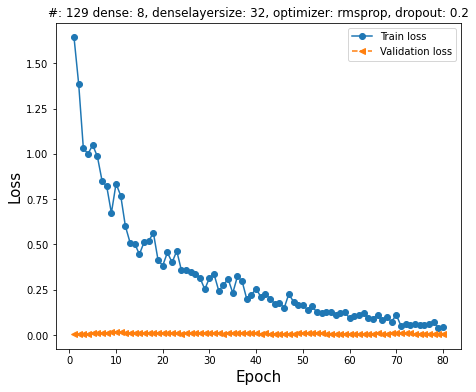

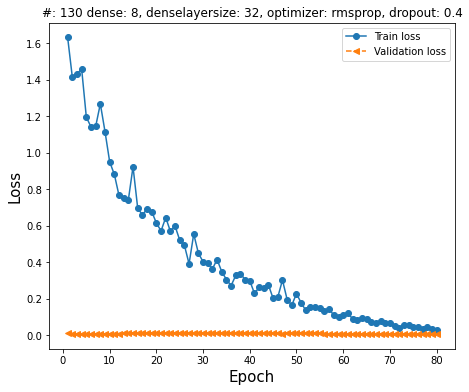

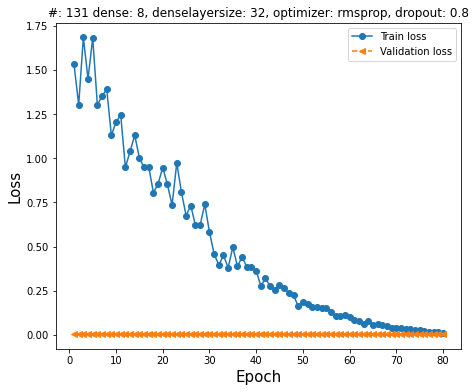

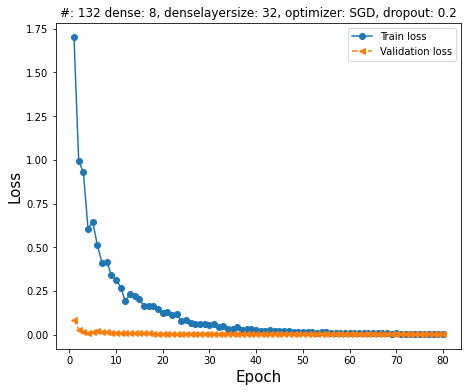

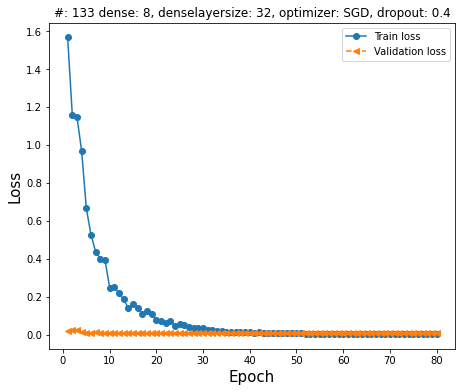

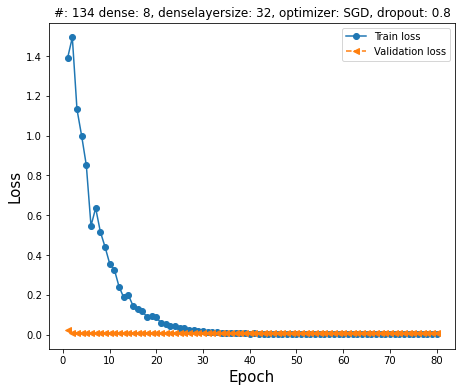

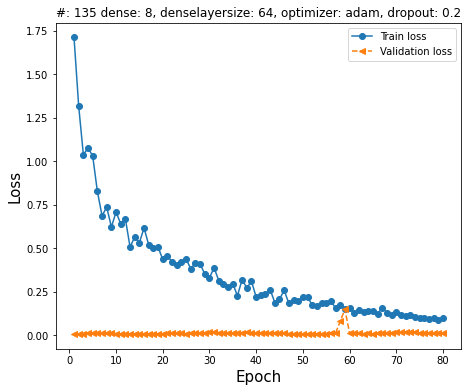

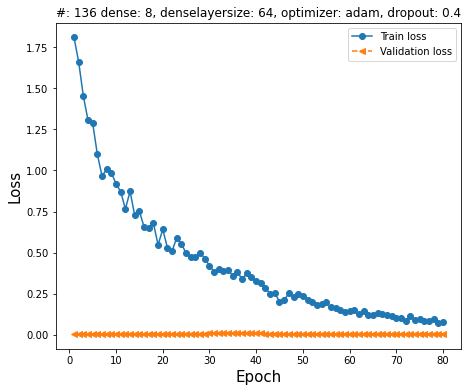

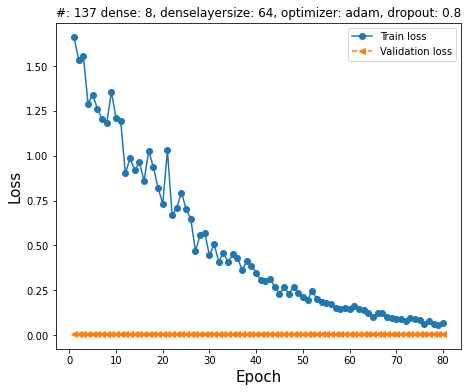

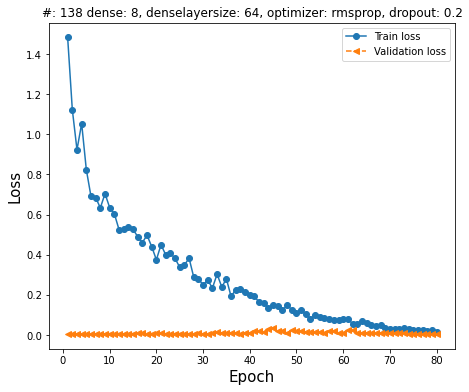

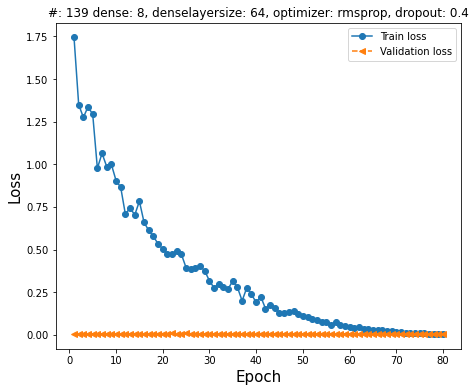

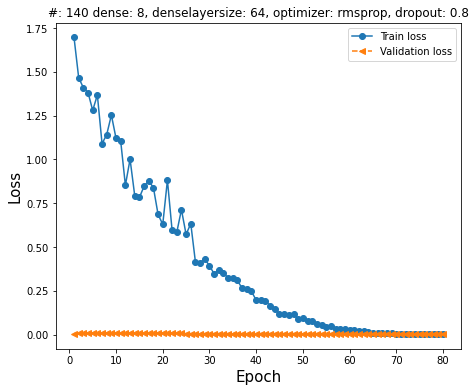

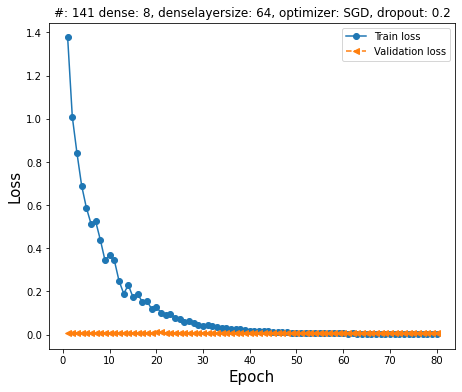

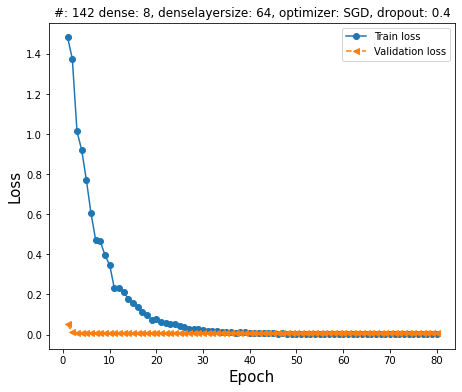

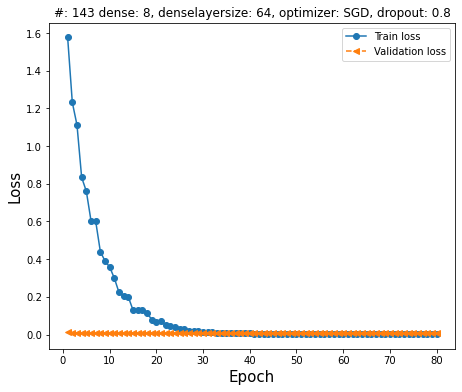

In [93]:
for count, model in enumerate(model_dict): # should be model_dict
    x_arr = np.arange(len(model_dict[model]['history']['loss'])) + 1

    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, model_dict[model]['history']['loss'], '-o', label='Train loss')
    ax.plot(x_arr, model_dict[model]['history']['val_loss'], '--<', label='Validation loss')
    ax.set_title(label= (f"#: {count} dense: {model_dict[model]['densenumber']}, denselayersize: {model_dict[model]['denselayersize']}, optimizer: {model_dict[model]['optimizer']}, dropout: {model_dict[model]['dropoutrate']}"))
    ax.legend(fontsize=10)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    # plt.savefig(f'{model}.png')

    # ax = fig.add_subplot(1, 2, 2)
    # ax.plot(x_arr, model['history']['MSE_Training'], '-o', label='Train acc.')
    # ax.plot(x_arr, model['history']['MSE_Test'], '--<', label='Validation acc.')
    # ax.legend(fontsize=15)
    # ax.set_xlabel('Epoch', size=15)
    # ax.set_ylabel('Accuracy', size=15)
    # plt.show()


In [139]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)
LSTM_tuned = buildmodel(layer=[ "LSTM"], densenumber=8, denselayersize=8, optimizer='rmsprop', dropoutrate=0.4)

In [140]:
model_history_tuned = LSTM_tuned.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=330, batch_size=72, verbose=0, shuffle=False)
predictions_tuned = LSTM_tuned.predict(X_test_LSTM)
# y_val = Y_test_LSTM
# predictions2 = pd.DataFrame(predictions)                        

# Y_3 = pd.DataFrame(y_val)
# correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

hist_LSTM_tuned = model_history_tuned.history
error_Training_LSTM_tuned = mean_squared_error(Y_train_LSTM, LSTM_tuned.predict(X_train_LSTM))
predicted_LSTM_tuned = LSTM_tuned.predict(X_test_LSTM)
error_Test_LSTM_tuned = mean_squared_error(Y_test, predicted)

# test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
test_rmse_LSTM_tuned= np.sqrt(error_Test_LSTM_tuned)

1/1 [==============================] - 0s 17ms/step


In [141]:
predictions_tuned

array([[0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028],
       [0.00330028]], dtype=float32)

In [142]:
LSTM_tuned.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 29)]           0         
                                                                 
 lstm (LSTM)                 (None, 50)                16000     
                                                                 
 dense (Dense)               (None, 8)                 408       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                             

In [143]:
s['LSTM_tuned_predicted'] = predictions_tuned
s

TSLA_AdjClose_pred  LM_predicted  LSTM_predicted  \
dt                                                             
2021-01-27           -0.028582     -0.072693       -0.074225   
2021-02-01            0.014681      0.000055        0.003721   
2021-02-06           -0.048775     -0.055997       -0.052754   
2021-02-11           -0.019206     -0.040568       -0.035290   
2021-02-16           -0.018916     -0.036962       -0.031718   
2021-02-21           -0.145506     -0.136202       -0.137714   
2021-02-26           -0.033570     -0.075397       -0.059394   
2021-03-03           -0.148604     -0.146721       -0.140991   
2021-03-08            0.208803      0.085015        0.113375   
2021-03-13           -0.060261     -0.004592        0.010015   
2021-03-18            0.013685      0.021482        0.040381   
2021-03-23           -0.067870     -0.059397       -0.047355   
2021-03-28            0.067251      0.032144        0.048324   
2021-04-02            0.013837      0.005826        0.014706   
2021-04-07            0.045181      0.019742        0.030629   
2021-04-12            0.052448      0.038339        0.051249   
2021-04-17           -0.027532     -0.004820        0.005018   
2021-04-22           -0.020992     -0.055913       -0.049207   
2021-04-27            0.006647     -0.042652       -0.038439   
2021-05-02           -0.053667     -0.074919       -0.075470   
2021-05-07           -0.130873     -0.129522       -0.132386   
2021-05-12           -0.022388     -0.056426       -0.048395   
2021-05-17            0.006997     -0.034894       -0.019278   
2021-05-22            0.082524      0.009391        0.028097   
2021-05-27           -0.011078     -0.030157       -0.017803   
2021-06-01           -0.040645     -0.064125       -0.050382   
2021-06-06            0.017934     -0.027844       -0.011133   
2021-06-11           -0.008265     -0.054300       -0.044096   
2021-06-16            0.026044     -0.016370       -0.003021   
2021-06-21            0.079008      0.026869        0.045380   
2021-06-26            0.008964     -0.038905       -0.030544   
2021-07-01           -0.027426     -0.069169       -0.064765   

            LSTM_tuned_predicted  
dt                                
2021-01-27                0.0033  
2021-02-01                0.0033  
2021-02-06                0.0033  
2021-02-11                0.0033  
2021-02-16                0.0033  
2021-02-21                0.0033  
2021-02-26                0.0033  
2021-03-03                0.0033  
2021-03-08                0.0033  
2021-03-13                0.0033  
2021-03-18                0.0033  
2021-03-23                0.0033  
2021-03-28                0.0033  
2021-04-02                0.0033  
2021-04-07                0.0033  
2021-04-12                0.0033  
2021-04-17                0.0033  
2021-04-22                0.0033  
2021-04-27                0.0033  
2021-05-02                0.0033  
2021-05-07                0.0033  
2021-05-12                0.0033  
2021-05-17                0.0033  
2021-05-22                0.0033  
2021-05-27                0.0033  
2021-06-01                0.0033  
2021-06-06                0.0033  
2021-06-11                0.0033  
2021-06-16                0.0033  
2021-06-21                0.0033  
2021-06-26                0.0033  
2021-07-01                0.0033

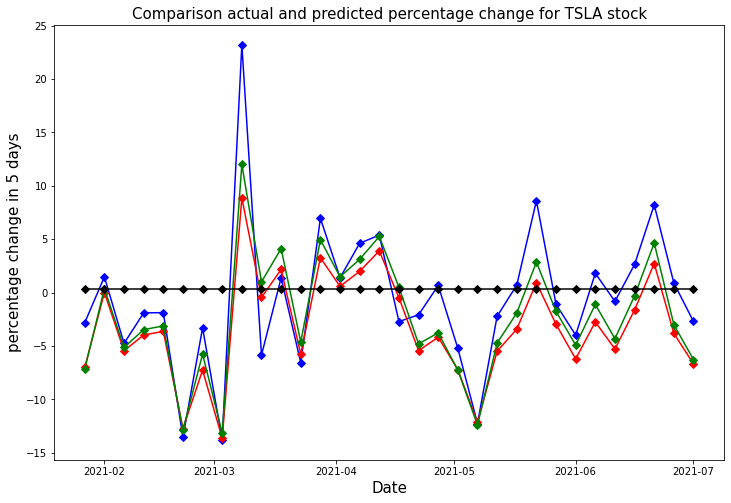

In [144]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')
axs.plot( (np.exp(s['LSTM_tuned_predicted'])-1)*100, label = "LSTM tuned predicted value", color = 'black', marker='D')


axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

In [100]:
test_results

[0.001627931460216542,
 0.004848399627421507,
 0.006255032018337884,
 0.02114919928192223,
 0.008969653903843966,
 0.007845444470567746,
 0.007414797859594425,
 0.0011202836984835107,
 0.004099266345692926,
 0.0010960243884171191]

In [101]:
error_Training_LSTM_tuned

0.004195040682995089

In [102]:
test_results.append(error_Test_LSTM_tuned)
train_results.append(error_Training_LSTM_tuned)
names.append("LSTM_tuned")


In [103]:
len(test_results)

11

In [105]:
len(train_results)

10

In [106]:
len(names)

11

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (10,).

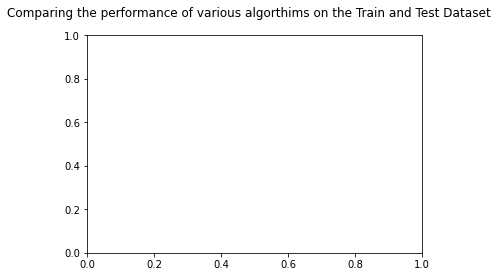

In [107]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [ ]:
Y_test

dt
2021-01-27   -0.028582
2021-02-01    0.014681
2021-02-06   -0.048775
2021-02-11   -0.019206
2021-02-16   -0.018916
2021-02-21   -0.145506
2021-02-26   -0.033570
2021-03-03   -0.148604
2021-03-08    0.208803
2021-03-13   -0.060261
2021-03-18    0.013685
2021-03-23   -0.067870
2021-03-28    0.067251
2021-04-02    0.013837
2021-04-07    0.045181
2021-04-12    0.052448
2021-04-17   -0.027532
2021-04-22   -0.020992
2021-04-27    0.006647
2021-05-02   -0.053667
2021-05-07   -0.130873
2021-05-12   -0.022388
2021-05-17    0.006997
2021-05-22    0.082524
2021-05-27   -0.011078
2021-06-01   -0.040645
2021-06-06    0.017934
2021-06-11   -0.008265
2021-06-16    0.026044
2021-06-21    0.079008
2021-06-26    0.008964
2021-07-01   -0.027426
Name: TSLA_AdjClose_pred, dtype: float64

In [ ]:
return_period = 5

baseline_pred = Y_test.diff(return_period).shift(return_period) #.dropna(inplace=True)
baseline_test = Y_test.diff(return_period)
baseline_pred

# base_line = mean_squared_error(baseline_pred, baseline_test)
# base_line

dt
2021-01-27         NaN
2021-02-01         NaN
2021-02-06         NaN
2021-02-11         NaN
2021-02-16         NaN
2021-02-21         NaN
2021-02-26         NaN
2021-03-03         NaN
2021-03-08         NaN
2021-03-13         NaN
2021-03-18   -0.116924
2021-03-23   -0.048251
2021-03-28   -0.099829
2021-04-02    0.228009
2021-04-07   -0.041344
2021-04-12    0.159191
2021-04-17   -0.034301
2021-04-22    0.215855
2021-04-27   -0.194967
2021-05-02    0.105441
2021-05-07    0.038763
2021-05-12    0.040338
2021-05-17   -0.088243
2021-05-22   -0.007190
2021-05-27   -0.098848
2021-06-01   -0.183321
2021-06-06    0.005144
2021-06-11    0.027988
2021-06-16    0.075877
2021-06-21    0.042589
2021-06-26    0.090228
2021-07-01    0.040322
Name: TSLA_AdjClose_pred, dtype: float64

In [ ]:
baseline_df = pd.DataFrame(baseline_test).merge(baseline_pred, on='dt',how='outer')
baseline_df.dropna(inplace=True)
baseline_df

In [ ]:
base_line = mean_squared_error(baseline_df['TSLA_AdjClose_pred_x'], baseline_df['TSLA_AdjClose_pred_y'])

In [ ]:
base_line

0.034716558516228464